In [1]:
import matplotlib.pyplot as plt
from simtk.openmm import app
from simtk import openmm, unit
from openeye import oechem
from sys import stdout
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import sys
import string
from rdkit import Chem
import lxml.etree as etree

from simtk.openmm.app import element as elem
from simtk.openmm.app import Topology

import os
import math
import copy
import re
import numpy
import random

from simtk import openmm, unit

import time

import itertools

from rdkit import Chem


import sys
import io
from IPython.nbformat import current
import openeye.oechem
import openeye.oeomega
import openeye.oequacpac

from openeye import oechem, oequacpac
from openeye.oechem import *
from openeye.oedepict import *
from IPython.core.display import Image, display
from openforcefield.typing.engines.smirnoff import forcefield_rdk
from openforcefield.typing.engines import smirnoff
#from openforcefield import *
from openforcefield.utils import *
def RetrieveMol2Block(fileLikeObject, delimiter="@<TRIPOS>MOLECULE"):
    """generator which retrieves one mol2 block at a time
    """
    mol2 = []
    for line in fileLikeObject:
        if line.startswith(delimiter) and mol2:
            yield "".join(mol2)
            mol2 = []
        mol2.append(line)
    if mol2:
        yield "".join(mol2)
# sys.path.insert(0, os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/utils/")
# #from utils import *
# from utils import get_data_filename, extractPositionsFromOEMol, generateTopologyFromOEMol, extractPositionsFromRDKMol

# sys.path.insert(0, os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/typing/engines/smirnoff/")
# from forcefield import *
# from forcefield_utils import *

/home/shuzhe/anaconda2/envs/oepython2/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/home/shuzhe/anaconda2/envs/oepython2/lib/python2.7/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


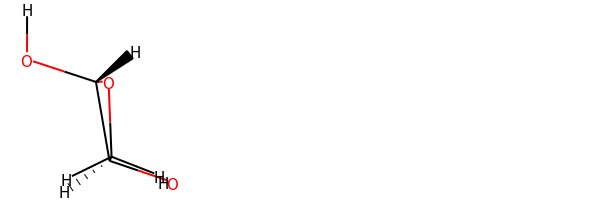

AlkEthOH_r0
     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    0.1466   -0.6972   -1.2190 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1072   -0.7754    0.3061 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.1521    0.7339    0.2375 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.0894    0.7465   -1.1920 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.3221   -1.1878    0.9520 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4710    1.1671    0.6094 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.0701   -1.0576   -1.6805 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7173   -1.1199   -1.7408 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7451   -1.3515    0.6836 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.6019    1.3396    0.7541 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.1323   -1.1855    1.8998 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4701    2.1287    0.5135 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  4  1  0
  2  3  1  0
  2  5  1  0
  3  4  1  0
  3  6  1  0
  1  7

In [2]:
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2"
ff_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/forcefield/smirnoff99Frosst.ffxml"
# mol_filename = "/home/shuzhe/Documents/openforcefield/openforcefield/data/molecules/MiniDrugBank_tripos.mol2"
mol = Chem.MolFromMol2File(mol_filename, sanitize = True, removeHs = False)
x = Draw.MolsToGridImage([mol])
display(x)

print Chem.MolToMolBlock(mol)
positions_rdk = extractPositionsFromRDKMol(mol)
#print positions

# atoms = mol.GetAtoms()
# print atoms[0].GetPropsAsDict()
# #print list(atoms[0].GetPropNames())
# atoms[0].SetDoubleProp("PartialCharge", 0.3)
# print atoms[0].GetPropsAsDict()["PartialCharge"]
# [float(a.GetPropsAsDict()["_TriposPartialCharge"]) if "_TriposPartialCharge" in a.GetPropsAsDict() else 0.0 for a in mol.GetAtoms()]

In [ ]:

Chem.Draw.MolsToGridImage([mol],molsPerRow=1)


#print positions

# Load a SMIRNOFF small molecule forcefield for alkanes, ethers, and alcohols
forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
#forcefield = ForceField('/home/shuzhe/Documents/openforcefield/openforcefield/data/forcefield/Frosst_AlkEtOH_parmAtFrosst.ffxml')

# Create the OpenMM system
topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(mol)
system_rdk = forcefield.createSystem(topology_rdk, [mol])

#g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology, topology, system, system, positions)

In [ ]:
# mol_filename = '/home/shuzhe/Documents/openforcefield/examples/SMIRNOFF_simulation/AlkEthOH_r51.mol2'
# mol_filename = '/home/shuzhe/Documents/openforcefield/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2'

# Load molecule using OpenEye tools
mol = oechem.OEGraphMol()
ifs = oechem.oemolistream(mol_filename)
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
ifs.SetFlavor( oechem.OEFormat_MOL2, flavor)
oechem.OEReadMolecule(ifs, mol )
oechem.OETriposAtomNames(mol)

# Get positions in OpenMM-compatible format
positions_oe = extractPositionsFromOEMol(mol)
#print positions

# Load a SMIRNOFF small molecule forcefield for alkanes, ethers, and alcohols
forcefield = smirnoff.forcefield.ForceField(ff_filename)
#forcefield = ForceField('/home/shuzhe/Documents/openforcefield/openforcefield/data/forcefield/Frosst_AlkEtOH_parmAtFrosst.ffxml')

# Create the OpenMM system
topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(mol)
system_oe = forcefield.createSystem(topology_oe, [mol])

g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, skip_assert = True)






In [ ]:

def getNthmol(n):
    counter  = 0
    for i in RetrieveMol2Block(open(mol_filename, "r")):
        if counter == n:
            return i
        counter += 1
        
mol2 = getNthmol(14)
mol2 = getNthmol(0)




# print(mol2)

rdkmol = Chem.MolFromMol2Block(mol2,  removeHs = True)

print  Chem.MolToMolBlock(rdkmol)[0:21]
# Chem.Kekulize(rdkmol)
rdkmol = Chem.Mol(rdkmol)
x = Draw.MolsToGridImage([rdkmol], kekulize = False)
display(x)
    

In [ ]:
def compare_energies(rdkmol, oemol):
    if rdkmol == None:
        print "RDK parsing error"
        return
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol])
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol])

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
#     g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_oe, system_oe, system_oe, positions_oe, positions_oe, verbose = False,skip_assert = True)
    for i in g1:
        print(i)
        print g1[i], g2[i], g1[i] == g2[i]
    print e1, e2
    print

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"
mol_filename = "/home/shuzhe/Documents/zinc-subset-tripos.mol2"
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/DrugBank_tripos.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
istream.SetFlavor( oechem.OEFormat_MOL2, flavor)
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oechem.OETriposAtomNames(mol)
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()

counter = 0
for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
    rdkmol = Chem.MolFromMol2Block(mol2, sanitize = True, removeHs = False)
    print  Chem.MolToMolBlock(rdkmol)[0:21]
    compare_energies(rdkmol, oemols_tripos[counter])
#     Chem.Kekulize(rdkmol)
#     compare_energies(rdkmol, oemols_tripos[counter])
    counter += 1
    print("--------")
    


DrugBank_2
     RDKit
nb
51.8845030324 kJ/mol 51.8845030324 kJ/mol True
torsion
387.09777948 kJ/mol 386.788893782 kJ/mol False
angle
837.519408986 kJ/mol 840.760191996 kJ/mol False
bond
91.5468862934 kJ/mol 115866.467888 kJ/mol False
1368.04857779 kJ/mol 117145.901477 kJ/mol

--------
DrugBank_7
     RDKit
nb
-14.6378474262 kJ/mol -14.6378474262 kJ/mol True
torsion
230.704849466 kJ/mol 230.704842128 kJ/mol False
angle
216.796412138 kJ/mol 218.026283584 kJ/mol False
bond
56.109050576 kJ/mol 57809.2856037 kJ/mol False
488.972464753 kJ/mol 58243.378882 kJ/mol

--------
DrugBank_8
     RDKit
nb
38.4804773659 kJ/mol 38.4804773659 kJ/mol True
torsion
9.95225805923 kJ/mol 9.95225805923 kJ/mol True
angle
37.3531591353 kJ/mol 37.3531591353 kJ/mol True
bond
11.7744150818 kJ/mol 11.7744150818 kJ/mol True
97.5603096422 kJ/mol 97.5603096422 kJ/mol

--------
DrugBank_11
     RDKi
nb
-1.51695500746 kJ/mol -1.51695500746 kJ/mol True
torsion
8.31410912691 kJ/mol 7.74636757925 kJ/mol False
angle
109.216

nb
9.45028737838 kJ/mol 9.45028737838 kJ/mol True
torsion
9.341334161 kJ/mol 9.341334161 kJ/mol True
angle
38.7339604203 kJ/mol 38.7339604203 kJ/mol True
bond
3.82557053658 kJ/mol 3.82557053658 kJ/mol True
61.3511524962 kJ/mol 61.3511524962 kJ/mol

--------
DrugBank_43
     RDKi
nb
6.16690178589 kJ/mol 6.16690178589 kJ/mol True
torsion
5.06303362115 kJ/mol 5.06305302065 kJ/mol False
angle
106.09952199 kJ/mol 107.329395811 kJ/mol False
bond
9.13727211607 kJ/mol 57762.4553441 kJ/mol False
126.466729513 kJ/mol 57881.0146947 kJ/mol

--------
DrugBank_44
     RDKi
nb
3.44503518166 kJ/mol 3.44503518166 kJ/mol True
torsion
7.28278516698 kJ/mol 7.28278516698 kJ/mol True
angle
31.1840269947 kJ/mol 31.1840269947 kJ/mol True
bond
2.89316466979 kJ/mol 2.89316466979 kJ/mol True
44.8050120131 kJ/mol 44.8050120131 kJ/mol

--------
DrugBank_45
     RDKi
nb
37.4014253631 kJ/mol 37.4014253631 kJ/mol True
torsion
26.1434624438 kJ/mol 1.71334475066 kJ/mol False
angle
64.879052014 kJ/mol 67.1797549464 kJ/m

nb
1596.7783161 kJ/mol 1596.7783161 kJ/mol True
torsion
66.200416098 kJ/mol 66.200416098 kJ/mol True
angle
49.7058287541 kJ/mol 49.7058287541 kJ/mol True
bond
81355.2475172 kJ/mol 81355.2475172 kJ/mol True
83067.9320782 kJ/mol 83067.9320782 kJ/mol

--------
DrugBank_82
     RDKi
nb
45.4270300817 kJ/mol 45.4270300817 kJ/mol True
torsion
48.2469477412 kJ/mol 48.2469477412 kJ/mol True
angle
16.6138043665 kJ/mol 16.6138043665 kJ/mol True
bond
4.51450746597 kJ/mol 4.51450746597 kJ/mol True
114.802289655 kJ/mol 114.802289655 kJ/mol

--------
DrugBank_83
     RDKi
nb
20.1858923631 kJ/mol 20.1858923631 kJ/mol True
torsion
5.02197893814 kJ/mol 5.02197893814 kJ/mol True
angle
26.5308686715 kJ/mol 26.5308686715 kJ/mol True
bond
3.13258605116 kJ/mol 3.13258605116 kJ/mol True
54.8713260239 kJ/mol 54.8713260239 kJ/mol

--------
DrugBank_84
     RDKi
nb
39.7160224286 kJ/mol 39.7160224286 kJ/mol True
torsion
28.2840780862 kJ/mol 28.2840780862 kJ/mol True
angle
144.838318532 kJ/mol 144.838318532 kJ/mol

nb
28.1735470776 kJ/mol 28.1735470776 kJ/mol True
torsion
18.1576359606 kJ/mol 18.1576359606 kJ/mol True
angle
10.2084384735 kJ/mol 10.2084384735 kJ/mol True
bond
3.95548077972 kJ/mol 3.95548077972 kJ/mol True
60.4951022914 kJ/mol 60.4951022914 kJ/mol

--------
DrugBank_126
     RDK
nb
40.9469764275 kJ/mol 40.9469764275 kJ/mol True
torsion
64.0599573146 kJ/mol 64.0599573146 kJ/mol True
angle
6.14623742431 kJ/mol 6.14623742431 kJ/mol True
bond
27.422321938 kJ/mol 27.422321938 kJ/mol True
138.575493104 kJ/mol 138.575493104 kJ/mol

--------
DrugBank_127
     RDK
nb
30.9903719409 kJ/mol 30.9903719409 kJ/mol True
torsion
37.6562961486 kJ/mol 20.9203406934 kJ/mol False
angle
22.4060851649 kJ/mol 22.7237706854 kJ/mol False
bond
12.2780158749 kJ/mol 57346.6889315 kJ/mol False
103.330769129 kJ/mol 57421.3234149 kJ/mol

--------
DrugBank_128
     RDK
nb
45.3055205572 kJ/mol 45.3055205572 kJ/mol True
torsion
36.7707595225 kJ/mol 36.7707595225 kJ/mol True
angle
28.1626889539 kJ/mol 28.1626889539 k

nb
72.1301500211 kJ/mol 72.1301500211 kJ/mol True
torsion
10.3677699649 kJ/mol 0.0421008954685 kJ/mol False
angle
37.9368157354 kJ/mol 37.9368157354 kJ/mol True
bond
41.5502017779 kJ/mol 113506.04221 kJ/mol False
161.984937499 kJ/mol 113616.151276 kJ/mol

--------
DrugBank_159
     RDK
nb
-4.49933883254 kJ/mol -4.49933883254 kJ/mol True
torsion
118.8693744 kJ/mol 96.8102550283 kJ/mol False
angle
446.986710364 kJ/mol 450.34660374 kJ/mol False
bond
35.6990316543 kJ/mol 72900.0495302 kJ/mol False
597.055777586 kJ/mol 73442.7070501 kJ/mol

--------
DrugBank_160
     RDK
nb
32.777703477 kJ/mol 32.777703477 kJ/mol True
torsion
21.1333302847 kJ/mol 24.6262652124 kJ/mol False
angle
136.153325182 kJ/mol 136.153325182 kJ/mol True
bond
14.6999939715 kJ/mol 14.6999939715 kJ/mol True
204.764352915 kJ/mol 208.257287843 kJ/mol

--------
DrugBank_161
     RDK
nb
97.6428456596 kJ/mol 97.6428456596 kJ/mol True
torsion
62.777695485 kJ/mol 62.777695485 kJ/mol True
angle
11.48593576 kJ/mol 11.48593576 kJ/m

nb
-3.7142786672 kJ/mol -3.7142786672 kJ/mol True
torsion
106.364376533 kJ/mol 110.680398359 kJ/mol False
angle
469.60458559 kJ/mol 469.60458559 kJ/mol True
bond
29.6303222105 kJ/mol 57745.4481529 kJ/mol False
601.885005666 kJ/mol 58322.0188581 kJ/mol

--------
DrugBank_194
     RDK
nb
20.0117173268 kJ/mol 20.0117173268 kJ/mol True
torsion
20.0928524962 kJ/mol 20.0928524962 kJ/mol True
angle
33.946036382 kJ/mol 33.946036382 kJ/mol True
bond
6.57212619986 kJ/mol 6.57212619986 kJ/mol True
80.6227324049 kJ/mol 80.6227324049 kJ/mol

--------
DrugBank_195
     RDK
nb
52.7436078771 kJ/mol 52.7436078771 kJ/mol True
torsion
178.824297784 kJ/mol 178.824297784 kJ/mol True
angle
661.696167578 kJ/mol 661.696167578 kJ/mol True
bond
22.9031046829 kJ/mol 22.9031046829 kJ/mol True
916.167177922 kJ/mol 916.167177922 kJ/mol

--------
DrugBank_196
     RDK
nb
339.500801925 kJ/mol 339.500801925 kJ/mol True
torsion
97.1720468068 kJ/mol 97.1720468068 kJ/mol True
angle
362.747880921 kJ/mol 362.747880921 kJ/m

nb
24.2366767651 kJ/mol 24.2366767651 kJ/mol True
torsion
12.4803496037 kJ/mol 12.4803496037 kJ/mol True
angle
17.0545272379 kJ/mol 17.0545272379 kJ/mol True
bond
13.8038067571 kJ/mol 13.8038067571 kJ/mol True
67.5753603637 kJ/mol 67.5753603637 kJ/mol

--------
DrugBank_238
     RDK
nb
0.693438301784 kJ/mol 0.693438301784 kJ/mol True
torsion
38.4789021298 kJ/mol 38.4789021298 kJ/mol True
angle
122.598793633 kJ/mol 122.598793633 kJ/mol True
bond
11.5470323162 kJ/mol 11.5470323162 kJ/mol True
173.318166381 kJ/mol 173.318166381 kJ/mol

--------
DrugBank_239
     RDK
nb
20.8402474634 kJ/mol 20.8402474634 kJ/mol True
torsion
91.8359159072 kJ/mol 91.8359159072 kJ/mol True
angle
19.1826210847 kJ/mol 19.1826210847 kJ/mol True
bond
13.4477214798 kJ/mol 13.4477214798 kJ/mol True
145.306505935 kJ/mol 145.306505935 kJ/mol

--------
DrugBank_240
     RDK
nb
86.6111380496 kJ/mol 86.6111380496 kJ/mol True
torsion
31.661167754 kJ/mol 31.661167754 kJ/mol True
angle
22.7765442202 kJ/mol 22.7765442202 kJ

nb
61.9147482273 kJ/mol 61.9147482273 kJ/mol True
torsion
92.1546286718 kJ/mol 92.1546286718 kJ/mol True
angle
356.614773946 kJ/mol 356.614773946 kJ/mol True
bond
16.7428566849 kJ/mol 16.7428566849 kJ/mol True
527.42700753 kJ/mol 527.42700753 kJ/mol

--------
DrugBank_287
     RDK
nb
22.3404383334 kJ/mol 22.3404383334 kJ/mol True
torsion
9.71928283615 kJ/mol 9.71928283615 kJ/mol True
angle
27.9615550453 kJ/mol 27.9615550453 kJ/mol True
bond
2.83246140942 kJ/mol 2.83246140942 kJ/mol True
62.8537376243 kJ/mol 62.8537376243 kJ/mol

--------
DrugBank_288
     RDK
nb
131.442436232 kJ/mol 131.442436232 kJ/mol True
torsion
17.7743531792 kJ/mol 17.7743531792 kJ/mol True
angle
49.9879469244 kJ/mol 49.9879469244 kJ/mol True
bond
50.2950913305 kJ/mol 50.2950913305 kJ/mol True
249.499827666 kJ/mol 249.499827666 kJ/mol

--------
DrugBank_289
     RDK
nb
-13.4515038153 kJ/mol -13.4515038153 kJ/mol True
torsion
7.84630048624 kJ/mol 5.16290437348 kJ/mol False
angle
154.813263323 kJ/mol 154.813263323 k

nb
7.80867333322 kJ/mol 7.80867333322 kJ/mol True
torsion
39.5536668029 kJ/mol 39.5536668029 kJ/mol True
angle
17.1347808479 kJ/mol 17.1347808479 kJ/mol True
bond
10.8639357171 kJ/mol 10.8639357171 kJ/mol True
75.3610567011 kJ/mol 75.3610567011 kJ/mol

--------
DrugBank_321
     RDK
nb
31.5794929804 kJ/mol 31.5794929804 kJ/mol True
torsion
107.815091595 kJ/mol 50.7415299629 kJ/mol False
angle
319.942268034 kJ/mol 320.562645826 kJ/mol False
bond
48.4287480302 kJ/mol 113459.501092 kJ/mol False
507.76560064 kJ/mol 113862.38476 kJ/mol

--------
DrugBank_322
     RDK
nb
69.4925518185 kJ/mol 69.4925518185 kJ/mol True
torsion
28.5552515253 kJ/mol 29.8792023069 kJ/mol False
angle
22.7479749042 kJ/mol 22.7479749042 kJ/mol True
bond
13.3464381383 kJ/mol 13.3464381383 kJ/mol True
134.142216386 kJ/mol 135.466167168 kJ/mol

--------
DrugBank_323
     RDK
nb
96.1354310823 kJ/mol 96.1354310823 kJ/mol True
torsion
46.7690040537 kJ/mol 46.817373861 kJ/mol False
angle
31.4723839974 kJ/mol 31.4723839974 

nb
54.3201935793 kJ/mol 54.3201935793 kJ/mol True
torsion
134.675754851 kJ/mol 134.681458398 kJ/mol False
angle
90.227612197 kJ/mol 92.0295529296 kJ/mol False
bond
28.8589049087 kJ/mol 43627.5496681 kJ/mol False
308.082465536 kJ/mol 43908.580873 kJ/mol

--------
DrugBank_359
     RDK
nb
67.3164290513 kJ/mol 67.3164290513 kJ/mol True
torsion
61.7172488117 kJ/mol 61.7172488117 kJ/mol True
angle
34.5520215549 kJ/mol 34.5520215549 kJ/mol True
bond
16.4930120778 kJ/mol 16.4930120778 kJ/mol True
180.078711496 kJ/mol 180.078711496 kJ/mol

--------
DrugBank_360
     RDK
nb
306.716243373 kJ/mol 306.716243373 kJ/mol True
torsion
178.642823149 kJ/mol 178.642823149 kJ/mol True
angle
49.9039462179 kJ/mol 49.9039462179 kJ/mol True
bond
16.9280760883 kJ/mol 16.9280760883 kJ/mol True
552.191088828 kJ/mol 552.191088828 kJ/mol

--------
DrugBank_364
     RDK
nb
46.0546151764 kJ/mol 43.1943534989 kJ/mol False
torsion
46.6030334689 kJ/mol 46.6030334689 kJ/mol True
angle
12.0214092536 kJ/mol 12.0214092536 

nb
68.7069174361 kJ/mol 68.7069174361 kJ/mol True
torsion
15.9382435241 kJ/mol 16.8773904045 kJ/mol False
angle
26.7428887922 kJ/mol 26.7428887922 kJ/mol True
bond
15.5558559138 kJ/mol 15.5558559138 kJ/mol True
126.943905666 kJ/mol 127.883052547 kJ/mol

--------
DrugBank_397
     RDK
nb
45.3172500641 kJ/mol 45.3172500641 kJ/mol True
torsion
25.6586031028 kJ/mol 25.6586031028 kJ/mol True
angle
32.4125013724 kJ/mol 32.4125013724 kJ/mol True
bond
14.9162953548 kJ/mol 14.9162953548 kJ/mol True
118.304649894 kJ/mol 118.304649894 kJ/mol

--------
DrugBank_398
     RDK
nb
106.436226795 kJ/mol 106.436226795 kJ/mol True
torsion
379.214222156 kJ/mol 379.214222156 kJ/mol True
angle
532.243729041 kJ/mol 532.243729041 kJ/mol True
bond
89.3875195294 kJ/mol 89.3875195294 kJ/mol True
1107.28169752 kJ/mol 1107.28169752 kJ/mol

--------
DrugBank_400
     RDK
nb
5.69378537146 kJ/mol 5.69378537146 kJ/mol True
torsion
8.5268918605 kJ/mol 8.5268918605 kJ/mol True
angle
35.2584739166 kJ/mol 35.2584739166 kJ/

nb
113.323108121 kJ/mol 113.323108121 kJ/mol True
torsion
131.65296265 kJ/mol 127.678723213 kJ/mol False
angle
494.758973227 kJ/mol 494.758973227 kJ/mol True
bond
54.8774598038 kJ/mol 57808.2054768 kJ/mol False
794.612503802 kJ/mol 58543.9662814 kJ/mol

--------
DrugBank_437
     RDK
nb
14.6280053964 kJ/mol 14.6280053964 kJ/mol True
torsion
51.1375013095 kJ/mol 0.09283823123 kJ/mol False
angle
16.0825273852 kJ/mol 16.5609627852 kJ/mol False
bond
9.55340460962 kJ/mol 114785.152187 kJ/mol False
91.4014387007 kJ/mol 114816.433994 kJ/mol

--------
DrugBank_438
     RDK
nb
4.23938404744 kJ/mol 4.23938404744 kJ/mol True
torsion
0.00180366222797 kJ/mol 0.00180366222797 kJ/mol True
angle
19.9711617222 kJ/mol 19.9711617222 kJ/mol True
bond
3.34280573488 kJ/mol 3.34280573488 kJ/mol True
27.5551551667 kJ/mol 27.5551551667 kJ/mol

--------
DrugBank_439
     RDK
nb
0.153327576646 kJ/mol 0.153327576646 kJ/mol True
torsion
84.5737299377 kJ/mol 60.7690809332 kJ/mol False
angle
450.409193157 kJ/mol 450

nb
256.157445625 kJ/mol 256.157445625 kJ/mol True
torsion
112.854636742 kJ/mol 112.854636742 kJ/mol True
angle
381.090925687 kJ/mol 381.090925687 kJ/mol True
bond
28.2659296325 kJ/mol 28.2659296325 kJ/mol True
778.368937687 kJ/mol 778.368937687 kJ/mol

--------
DrugBank_476
     RDK
nb
42.0483143463 kJ/mol 42.0483143463 kJ/mol True
torsion
25.3576758295 kJ/mol 26.1001977844 kJ/mol False
angle
115.011583699 kJ/mol 116.219299227 kJ/mol False
bond
36.5365141528 kJ/mol 57552.7092895 kJ/mol False
218.954088027 kJ/mol 57737.0771009 kJ/mol

--------
DrugBank_478
     RDK
nb
86.9032632327 kJ/mol 86.9032632327 kJ/mol True
torsion
150.964227267 kJ/mol 150.964227267 kJ/mol True
angle
427.203652317 kJ/mol 427.203652317 kJ/mol True
bond
36.9796894589 kJ/mol 36.9796894589 kJ/mol True
702.050832276 kJ/mol 702.050832276 kJ/mol

--------
DrugBank_479
     RDK
nb
11.9289806178 kJ/mol 11.9289806178 kJ/mol True
torsion
12.3678597553 kJ/mol 12.3678597553 kJ/mol True
angle
2.54894082027 kJ/mol 2.54894082027

nb
15.7879845457 kJ/mol 15.7879845457 kJ/mol True
torsion
36.3080958143 kJ/mol 36.3080958143 kJ/mol True
angle
28.1934054243 kJ/mol 28.1934054243 kJ/mol True
bond
3.73865861463 kJ/mol 3.73865861463 kJ/mol True
84.028144399 kJ/mol 84.028144399 kJ/mol

--------
DrugBank_520
     RDK
nb
101.851763771 kJ/mol 101.851763771 kJ/mol True
torsion
5.5281733997 kJ/mol 0.137118481626 kJ/mol False
angle
93.4290863844 kJ/mol 95.4380303725 kJ/mol False
bond
7.18777889359 kJ/mol 58029.2531679 kJ/mol False
207.996802449 kJ/mol 58226.6800805 kJ/mol

--------
DrugBank_521
     RDK
nb
11.9569404119 kJ/mol 11.9569404119 kJ/mol True
torsion
68.0852542902 kJ/mol 68.0852542902 kJ/mol True
angle
23.4544447679 kJ/mol 23.4544447679 kJ/mol True
bond
23.4733460133 kJ/mol 23.4733460133 kJ/mol True
126.969985483 kJ/mol 126.969985483 kJ/mol

--------
DrugBank_522
     RDK
nb
74.3136650555 kJ/mol 74.3136650555 kJ/mol True
torsion
73.9925632598 kJ/mol 73.9925632598 kJ/mol True
angle
362.553202835 kJ/mol 362.553202835 k

nb
34.6599996756 kJ/mol 34.6599996756 kJ/mol True
torsion
51.4108183752 kJ/mol 48.1797799876 kJ/mol False
angle
106.091910467 kJ/mol 109.891430726 kJ/mol False
bond
41.3457527861 kJ/mol 86489.4555019 kJ/mol False
233.508481304 kJ/mol 86682.1867123 kJ/mol

--------
DrugBank_561
     RDK
nb
39.3300373682 kJ/mol 39.3300373682 kJ/mol True
torsion
46.2218068034 kJ/mol 48.4147280254 kJ/mol False
angle
156.472577863 kJ/mol 156.472577863 kJ/mol True
bond
26.4740741279 kJ/mol 26.4740741279 kJ/mol True
268.498496163 kJ/mol 270.691417385 kJ/mol

--------
DrugBank_562
     RDK
nb
47.3565197623 kJ/mol 47.3565197623 kJ/mol True
torsion
88.7736866007 kJ/mol 89.9806196594 kJ/mol False
angle
12.3926545985 kJ/mol 12.3926545985 kJ/mol True
bond
18.6088939853 kJ/mol 18.6088939853 kJ/mol True
167.131754947 kJ/mol 168.338688006 kJ/mol

--------
DrugBank_563
     RDK
nb
44.421919528 kJ/mol 44.421919528 kJ/mol True
torsion
0.00684798949432 kJ/mol 0.00684798949432 kJ/mol True
angle
10.0128096042 kJ/mol 10.0128

nb
188.545569946 kJ/mol 188.545569946 kJ/mol True
torsion
63.8487491933 kJ/mol 60.447667719 kJ/mol False
angle
46.1444639275 kJ/mol 48.2968724388 kJ/mol False
bond
41.7558157714 kJ/mol 43830.112561 kJ/mol False
340.294598838 kJ/mol 44127.4026711 kJ/mol

--------
DrugBank_595
     RDK
nb
25.8899352109 kJ/mol 25.8899352109 kJ/mol True
torsion
66.2397856709 kJ/mol 25.9108704364 kJ/mol False
angle
250.31270288 kJ/mol 250.31270288 kJ/mol True
bond
26.776326753 kJ/mol 57010.7871761 kJ/mol False
369.218750515 kJ/mol 57312.9006846 kJ/mol

--------
DrugBank_596
     RDK
nb
18.005064354 kJ/mol 18.005064354 kJ/mol True
torsion
22.1873595395 kJ/mol 24.5891176268 kJ/mol False
angle
65.2762664201 kJ/mol 65.2762664201 kJ/mol True
bond
14.4281413336 kJ/mol 14.4281413336 kJ/mol True
119.896831647 kJ/mol 122.298589735 kJ/mol

--------
DrugBank_597
     RDK
nb
30.6795805955 kJ/mol 30.6795805955 kJ/mol True
torsion
31.373383583 kJ/mol 31.4190745232 kJ/mol False
angle
15.0930625338 kJ/mol 15.0930625338 kJ/

nb
51.5248728601 kJ/mol 51.5248728601 kJ/mol True
torsion
93.5093439426 kJ/mol 94.0044363169 kJ/mol False
angle
330.772672059 kJ/mol 330.772672059 kJ/mol True
bond
24.988455932 kJ/mol 24.988455932 kJ/mol True
500.795344794 kJ/mol 501.290437168 kJ/mol

--------
DrugBank_641
     RDK
nb
89.2850358799 kJ/mol 89.2850358799 kJ/mol True
torsion
54.0410004704 kJ/mol 54.0410004704 kJ/mol True
angle
72.8725191309 kJ/mol 72.8725191309 kJ/mol True
bond
10.2522107686 kJ/mol 10.2522107686 kJ/mol True
226.45076625 kJ/mol 226.45076625 kJ/mol

--------
DrugBank_642
     RDK
nb
90.0310814216 kJ/mol 90.0310814216 kJ/mol True
torsion
0.00088549568251 kJ/mol 0.00088549568251 kJ/mol True
angle
6.94017744059 kJ/mol 6.94017744059 kJ/mol True
bond
1.9761442249 kJ/mol 1.9761442249 kJ/mol True
98.9482885827 kJ/mol 98.9482885827 kJ/mol

--------
DrugBank_643
     RDK
nb
151.873231634 kJ/mol 151.873231634 kJ/mol True
torsion
104.260125374 kJ/mol 107.981052791 kJ/mol False
angle
550.058388532 kJ/mol 551.287077347 

nb
18.4923407816 kJ/mol 18.4923407816 kJ/mol True
torsion
68.9390089576 kJ/mol 18.7312980242 kJ/mol False
angle
27.765516243 kJ/mol 28.4024216362 kJ/mol False
bond
24.7066434386 kJ/mol 114538.059916 kJ/mol False
139.903509421 kJ/mol 114603.685976 kJ/mol

--------
DrugBank_677
     RDK
nb
51.5564746059 kJ/mol 51.5564746059 kJ/mol True
torsion
22.8879491402 kJ/mol 24.0720649332 kJ/mol False
angle
12.5654765531 kJ/mol 12.5654765531 kJ/mol True
bond
5.88793524695 kJ/mol 5.88793524695 kJ/mol True
92.8978355461 kJ/mol 94.0819513392 kJ/mol

--------
DrugBank_678
     RDK
nb
12.844761152 kJ/mol 12.844761152 kJ/mol True
torsion
17.7223321195 kJ/mol 17.7223321195 kJ/mol True
angle
3.56427233939 kJ/mol 3.56427233939 kJ/mol True
bond
8.06524650789 kJ/mol 8.06524650789 kJ/mol True
42.1966121188 kJ/mol 42.1966121188 kJ/mol

--------
DrugBank_679
     RDK
nb
62.210922747 kJ/mol 62.210922747 kJ/mol True
torsion
35.4005215298 kJ/mol 35.4005215298 kJ/mol True
angle
11.6341445097 kJ/mol 11.6341445097 kJ/

nb
55.5522630045 kJ/mol 55.5522630045 kJ/mol True
torsion
26.0049641633 kJ/mol 26.0049641633 kJ/mol True
angle
14.9326542401 kJ/mol 14.9326542401 kJ/mol True
bond
24.3045536043 kJ/mol 24.3045536043 kJ/mol True
120.794435012 kJ/mol 120.794435012 kJ/mol

--------
DrugBank_716
     RDK
nb
73.8123317099 kJ/mol 73.8123317099 kJ/mol True
torsion
28.5551341452 kJ/mol 29.8786020625 kJ/mol False
angle
28.7476120383 kJ/mol 28.7476120383 kJ/mol True
bond
14.7069048246 kJ/mol 14.7069048246 kJ/mol True
145.821982718 kJ/mol 147.145450635 kJ/mol

--------
DrugBank_718
     RDK
nb
16.2620923258 kJ/mol 16.2620923258 kJ/mol True
torsion
110.585531525 kJ/mol 110.585531525 kJ/mol True
angle
345.198950208 kJ/mol 345.198950208 kJ/mol True
bond
14.7531778698 kJ/mol 14.7531778698 kJ/mol True
486.799751929 kJ/mol 486.799751929 kJ/mol

--------
DrugBank_719
     RDK
nb
92.2271861218 kJ/mol 92.2271861218 kJ/mol True
torsion
90.2308830551 kJ/mol 90.2308830551 kJ/mol True
angle
376.216466171 kJ/mol 376.216466171 k

nb
92.8959712979 kJ/mol 92.8959712979 kJ/mol True
torsion
51.8164271091 kJ/mol 50.7083531985 kJ/mol False
angle
131.936168198 kJ/mol 133.813401734 kJ/mol False
bond
42.9562649556 kJ/mol 58027.4386785 kJ/mol False
319.60483156 kJ/mol 58304.8564048 kJ/mol

--------
DrugBank_757
     RDK
nb
91.8821387214 kJ/mol 91.8821387214 kJ/mol True
torsion
94.3753684275 kJ/mol 94.3753684275 kJ/mol True
angle
378.865977746 kJ/mol 378.865977746 kJ/mol True
bond
25.9858932424 kJ/mol 25.9858932424 kJ/mol True
591.109378138 kJ/mol 591.109378138 kJ/mol

--------
DrugBank_760
     RDK
nb
32.8275821196 kJ/mol 32.8275821196 kJ/mol True
torsion
88.2778396386 kJ/mol 61.8842631661 kJ/mol False
angle
152.603013812 kJ/mol 154.755405873 kJ/mol False
bond
21.5634154886 kJ/mol 101831.334005 kJ/mol False
295.271851059 kJ/mol 102080.801256 kJ/mol

--------
DrugBank_763
     RDK
nb
24.8520353265 kJ/mol 24.8520353265 kJ/mol True
torsion
66.2395008098 kJ/mol 25.9116349979 kJ/mol False
angle
248.846232398 kJ/mol 248.846232

nb
142.669360394 kJ/mol 142.669360394 kJ/mol True
torsion
112.365146063 kJ/mol 112.365146063 kJ/mol True
angle
384.998350826 kJ/mol 384.998350826 kJ/mol True
bond
11.3811061085 kJ/mol 11.3811061085 kJ/mol True
651.413963392 kJ/mol 651.413963392 kJ/mol

--------
DrugBank_794
     RDK
nb
23.2763260688 kJ/mol 23.2763260688 kJ/mol True
torsion
9.20586465369 kJ/mol 6.41129795792 kJ/mol False
angle
107.211233786 kJ/mol 107.211233786 kJ/mol True
bond
11.5133026301 kJ/mol 58033.2430401 kJ/mol False
151.206727139 kJ/mol 58170.1418979 kJ/mol

--------
DrugBank_795
     RDK
nb
43.638149233 kJ/mol 43.638149233 kJ/mol True
torsion
88.8950071332 kJ/mol 88.8950071332 kJ/mol True
angle
36.574403454 kJ/mol 36.574403454 kJ/mol True
bond
18.3839694419 kJ/mol 18.3839694419 kJ/mol True
187.491529262 kJ/mol 187.491529262 kJ/mol

--------
DrugBank_796
     RDK
nb
69.5494868327 kJ/mol 69.5494868327 kJ/mol True
torsion
26.932445237 kJ/mol 27.8087263311 kJ/mol False
angle
23.4336133026 kJ/mol 23.4336133026 kJ/m

nb
29.8803785745 kJ/mol 29.8803785745 kJ/mol True
torsion
50.3989954486 kJ/mol 50.3989954486 kJ/mol True
angle
24.2394344113 kJ/mol 24.2394344113 kJ/mol True
bond
17.2944239374 kJ/mol 17.2944239374 kJ/mol True
121.813232372 kJ/mol 121.813232372 kJ/mol

--------
DrugBank_833
     RDK
nb
27.8029133986 kJ/mol 27.8029133986 kJ/mol True
torsion
1.8112317063 kJ/mol 1.8112317063 kJ/mol True
angle
12.1913415161 kJ/mol 12.1913415161 kJ/mol True
bond
11.1537142076 kJ/mol 11.1537142076 kJ/mol True
52.9592008287 kJ/mol 52.9592008287 kJ/mol

--------
DrugBank_834
     RDK
nb
15.6121669217 kJ/mol 15.6121669217 kJ/mol True
torsion
46.8804636445 kJ/mol 46.9297362697 kJ/mol False
angle
116.795631684 kJ/mol 118.025336579 kJ/mol False
bond
8.01250439051 kJ/mol 57760.3388494 kJ/mol False
187.300766641 kJ/mol 57940.9060892 kJ/mol

--------
DrugBank_835
     RDK
nb
11.0886191594 kJ/mol 11.0886191594 kJ/mol True
torsion
22.0094987415 kJ/mol 8.67083601817 kJ/mol False
angle
170.492197372 kJ/mol 171.722142271 

nb
40.2626671808 kJ/mol 40.2626671808 kJ/mol True
torsion
72.5271129082 kJ/mol 72.5271129082 kJ/mol True
angle
306.682427141 kJ/mol 306.682427141 kJ/mol True
bond
14.5915022221 kJ/mol 14.5915022221 kJ/mol True
434.063709452 kJ/mol 434.063709452 kJ/mol

--------
DrugBank_872
     RDK
nb
20.4108804238 kJ/mol 20.4108804238 kJ/mol True
torsion
31.5425601053 kJ/mol 31.5424223772 kJ/mol False
angle
113.302804591 kJ/mol 113.302804591 kJ/mol True
bond
13.0747742497 kJ/mol 58261.4987813 kJ/mol False
178.33101937 kJ/mol 58426.7548887 kJ/mol

--------
DrugBank_873
     RDK
nb
15.5041864301 kJ/mol 15.5041864301 kJ/mol True
torsion
4.98779952811 kJ/mol 4.98779952811 kJ/mol True
angle
39.4148844259 kJ/mol 39.4148844259 kJ/mol True
bond
8.59456692795 kJ/mol 8.59456692795 kJ/mol True
68.501437312 kJ/mol 68.501437312 kJ/mol

--------
DrugBank_874
     RDK
nb
15.3127384171 kJ/mol 15.3127384171 kJ/mol True
torsion
5.57327271008 kJ/mol 5.57340698523 kJ/mol False
angle
187.070790508 kJ/mol 189.097083935 kJ

nb
81.0848045386 kJ/mol 81.0848045386 kJ/mol True
torsion
34.0017786715 kJ/mol 26.8905222305 kJ/mol False
angle
169.777408658 kJ/mol 169.777408658 kJ/mol True
bond
28.9198555215 kJ/mol 57320.8142623 kJ/mol False
313.78384739 kJ/mol 57598.5669977 kJ/mol

--------
DrugBank_911
     RDK
nb
67.0428324446 kJ/mol 67.0428324446 kJ/mol True
torsion
43.9358844998 kJ/mol 43.9358844998 kJ/mol True
angle
16.4157592867 kJ/mol 16.4157592867 kJ/mol True
bond
10.7729796853 kJ/mol 10.7729796853 kJ/mol True
138.167455916 kJ/mol 138.167455916 kJ/mol

--------
DrugBank_912
     RDK
nb
28.7549855334 kJ/mol 28.7549855334 kJ/mol True
torsion
113.533222269 kJ/mol 113.533222269 kJ/mol True
angle
41.8394769009 kJ/mol 41.8394769009 kJ/mol True
bond
3.99972632869 kJ/mol 3.99972632869 kJ/mol True
188.127411032 kJ/mol 188.127411032 kJ/mol

--------
DrugBank_913
     RDK
nb
18.3130480465 kJ/mol 18.3130480465 kJ/mol True
torsion
0.00021703215824 kJ/mol 0.000478273465704 kJ/mol False
angle
102.228812414 kJ/mol 104.768

nb
47.386431433 kJ/mol 47.386431433 kJ/mol True
torsion
102.30653867 kJ/mol 102.30653867 kJ/mol True
angle
84.6147651058 kJ/mol 84.6147651058 kJ/mol True
bond
42.096915252 kJ/mol 42.096915252 kJ/mol True
276.40465046 kJ/mol 276.40465046 kJ/mol

--------
DrugBank_952
     RDK
nb
16.4178293415 kJ/mol 16.4178293415 kJ/mol True
torsion
83.6157734392 kJ/mol 59.9937525119 kJ/mol False
angle
409.735124387 kJ/mol 409.735124387 kJ/mol True
bond
20.8027506453 kJ/mol 58003.6470888 kJ/mol False
530.571477813 kJ/mol 58489.7937951 kJ/mol

--------
DrugBank_954
     RDK
nb
42.7184023309 kJ/mol 42.7184023309 kJ/mol True
torsion
11.8891288383 kJ/mol 13.096204079 kJ/mol False
angle
4.65174024954 kJ/mol 4.65174024954 kJ/mol True
bond
9.06381244086 kJ/mol 9.06381244086 kJ/mol True
68.3230838596 kJ/mol 69.5301591002 kJ/mol

--------
DrugBank_956
     RDK
nb
1.10525039026 kJ/mol 1.10525039026 kJ/mol True
torsion
4.82266937213 kJ/mol 4.82266937213 kJ/mol True
angle
62.7120410437 kJ/mol 62.7120410437 kJ/mol T

nb
17.641447403 kJ/mol 17.641447403 kJ/mol True
torsion
119.556036184 kJ/mol 119.556036184 kJ/mol True
angle
25.7126787234 kJ/mol 25.7126787234 kJ/mol True
bond
9.27855943497 kJ/mol 9.27855943497 kJ/mol True
172.188721746 kJ/mol 172.188721746 kJ/mol

--------
DrugBank_998
     RDK
nb
11.2086659722 kJ/mol 11.2086659722 kJ/mol True
torsion
136.544369628 kJ/mol 136.544369628 kJ/mol True
angle
503.071468015 kJ/mol 503.071468015 kJ/mol True
bond
28.2327819899 kJ/mol 28.2327819899 kJ/mol True
679.057285605 kJ/mol 679.057285605 kJ/mol

--------
DrugBank_999
     RDK
nb
17.4323203401 kJ/mol 17.4323203401 kJ/mol True
torsion
16.7367152389 kJ/mol 16.7367152389 kJ/mol True
angle
24.6497168644 kJ/mol 24.6497168644 kJ/mol True
bond
21.9869657035 kJ/mol 21.9869657035 kJ/mol True
80.8057181469 kJ/mol 80.8057181469 kJ/mol

--------
DrugBank_1000
     RD
nb
215.775585877 kJ/mol 215.775585877 kJ/mol True
torsion
52.0844096868 kJ/mol 52.0844096868 kJ/mol True
angle
51.1706056458 kJ/mol 51.1706056458 kJ/m

nb
13.532669647 kJ/mol 13.532669647 kJ/mol True
torsion
84.6865207361 kJ/mol 84.6865207361 kJ/mol True
angle
398.342831179 kJ/mol 398.342831179 kJ/mol True
bond
13.3978861835 kJ/mol 13.3978861835 kJ/mol True
509.959907745 kJ/mol 509.959907745 kJ/mol

--------
DrugBank_1042
     RD
nb
0.0 kJ/mol 0.0 kJ/mol True
torsion
0.0 kJ/mol 0.0 kJ/mol True
angle
0.0 kJ/mol 0.0 kJ/mol True
bond
0.0 kJ/mol 0.0 kJ/mol True
0.0 kJ/mol 0.0 kJ/mol

--------
DrugBank_1044
     RD
nb
37.7939847007 kJ/mol 37.7939847007 kJ/mol True
torsion
64.1684367347 kJ/mol 50.3832344238 kJ/mol False
angle
92.3950762819 kJ/mol 92.3950762819 kJ/mol True
bond
22.1033124368 kJ/mol 29216.98275 kJ/mol False
216.460810154 kJ/mol 29397.5550454 kJ/mol

--------
DrugBank_1046
     RD
nb
24.7489430681 kJ/mol 24.7489430681 kJ/mol True
torsion
55.7037527868 kJ/mol 55.7037527868 kJ/mol True
angle
13.1991047915 kJ/mol 13.1991047915 kJ/mol True
bond
12.4132703798 kJ/mol 12.4132703798 kJ/mol True
106.065071026 kJ/mol 106.065071026 kJ/mo

nb
34.5292783896 kJ/mol 34.5292783896 kJ/mol True
torsion
61.0970292969 kJ/mol 61.0970292969 kJ/mol True
angle
89.9356264044 kJ/mol 89.9356264044 kJ/mol True
bond
13.2738388135 kJ/mol 13.2738388135 kJ/mol True
198.835772904 kJ/mol 198.835772904 kJ/mol

--------
DrugBank_1088
     RD
nb
79.4810594664 kJ/mol 79.4810594664 kJ/mol True
torsion
40.3167437984 kJ/mol 40.3167437984 kJ/mol True
angle
13.2642594666 kJ/mol 13.2642594666 kJ/mol True
bond
13.4045415689 kJ/mol 13.4045415689 kJ/mol True
146.4666043 kJ/mol 146.4666043 kJ/mol

--------
DrugBank_1090
     RD
nb
10.3616488512 kJ/mol 10.3616488512 kJ/mol True
torsion
136.431306617 kJ/mol 105.45908227 kJ/mol False
angle
395.505801407 kJ/mol 398.898929208 kJ/mol False
bond
38.9875062338 kJ/mol 101303.534788 kJ/mol False
581.286263109 kJ/mol 101818.254448 kJ/mol

--------
DrugBank_1091
     RD
nb
-1.5331783516 kJ/mol -1.5331783516 kJ/mol True
torsion
5.23008685925 kJ/mol 0.000193270401327 kJ/mol False
angle
91.3952662153 kJ/mol 93.0645084843

nb
37.8563118715 kJ/mol 37.8563118715 kJ/mol True
torsion
46.0293022906 kJ/mol 46.0293022906 kJ/mol True
angle
328.169022928 kJ/mol 328.169022928 kJ/mol True
bond
8.98461307368 kJ/mol 8.98461307368 kJ/mol True
421.039250163 kJ/mol 421.039250163 kJ/mol

--------
DrugBank_1130
     RD
nb
35.3002017632 kJ/mol 35.3002017632 kJ/mol True
torsion
27.5401256537 kJ/mol 28.1821969045 kJ/mol False
angle
118.112600581 kJ/mol 119.31909824 kJ/mol False
bond
20.9880714546 kJ/mol 57538.3480919 kJ/mol False
201.940999452 kJ/mol 57721.1495888 kJ/mol

--------
DrugBank_1131
     RD
nb
62.795505084 kJ/mol 62.795505084 kJ/mol True
torsion
45.224389596 kJ/mol 46.4246023208 kJ/mol False
angle
95.7577366004 kJ/mol 99.1145320274 kJ/mol False
bond
32.5887611023 kJ/mol 43703.7960339 kJ/mol False
236.366392383 kJ/mol 43912.1306733 kJ/mol

--------
DrugBank_1132
     RD
nb
10.4804350335 kJ/mol 10.4804350335 kJ/mol True
torsion
46.8835706691 kJ/mol 46.8835706691 kJ/mol True
angle
57.5194288886 kJ/mol 57.5194288886 

nb
19.7812942876 kJ/mol 19.7812942876 kJ/mol True
torsion
177.331766365 kJ/mol 172.10179497 kJ/mol False
angle
592.212530136 kJ/mol 592.212530136 kJ/mol True
bond
44.2823117167 kJ/mol 29236.7765748 kJ/mol False
833.607902505 kJ/mol 30020.8721942 kJ/mol

--------
DrugBank_1171
     RD
nb
8.54957095486 kJ/mol 8.54957095486 kJ/mol True
torsion
138.699539022 kJ/mol 132.440098813 kJ/mol False
angle
364.054626989 kJ/mol 366.205680228 kJ/mol False
bond
37.357931069 kJ/mol 43823.9423744 kJ/mol False
548.661668034 kJ/mol 44331.1377244 kJ/mol

--------
DrugBank_1172
     RD
nb
16.3579078667 kJ/mol 16.3579078667 kJ/mol True
torsion
101.936971256 kJ/mol 85.1080287362 kJ/mol False
angle
366.420030341 kJ/mol 369.775470324 kJ/mol False
bond
27.7956183692 kJ/mol 43697.7807233 kJ/mol False
512.510527832 kJ/mol 44169.0221302 kJ/mol

--------
DrugBank_1173
     RD
nb
19.5665292439 kJ/mol 19.5665292439 kJ/mol True
torsion
147.119105174 kJ/mol 147.119105174 kJ/mol True
angle
350.109619418 kJ/mol 350.109619

nb
293.665483732 kJ/mol 293.665483732 kJ/mol True
torsion
56.7329573141 kJ/mol 59.0244556172 kJ/mol False
angle
111.691789845 kJ/mol 113.596211389 kJ/mol False
bond
20.7319931329 kJ/mol 57937.881273 kJ/mol False
482.822224024 kJ/mol 58404.1674238 kJ/mol

--------
DrugBank_1208
     RD
nb
0.0 kJ/mol 0.0 kJ/mol True
torsion
3.37933728237e-06 kJ/mol 3.37933728237e-06 kJ/mol True
angle
27.5758856393 kJ/mol 27.5758856393 kJ/mol True
bond
71.4821855455 kJ/mol 71.4821855455 kJ/mol True
99.0580745642 kJ/mol 99.0580745642 kJ/mol

--------
DrugBank_1209
     RD
nb
65.1558263212 kJ/mol 65.1558263212 kJ/mol True
torsion
39.5483129414 kJ/mol 39.6272885815 kJ/mol False
angle
126.675517252 kJ/mol 128.030552227 kJ/mol False
bond
16.3765663916 kJ/mol 57774.7388822 kJ/mol False
247.756222907 kJ/mol 58007.5525493 kJ/mol

--------
DrugBank_1210
     RD
nb
91.9461724575 kJ/mol 91.9461724575 kJ/mol True
torsion
35.833051619 kJ/mol 35.833051619 kJ/mol True
angle
21.4917744436 kJ/mol 21.4917744436 kJ/mol True

nb
38.1561889584 kJ/mol 38.1561889584 kJ/mol True
torsion
59.3364947976 kJ/mol 59.3364947976 kJ/mol True
angle
297.360535078 kJ/mol 297.360535078 kJ/mol True
bond
9.31359247578 kJ/mol 9.31359247578 kJ/mol True
404.16681131 kJ/mol 404.16681131 kJ/mol

--------
DrugBank_1247
     RD
nb
27.9817265161 kJ/mol 27.9817265161 kJ/mol True
torsion
60.2090021963 kJ/mol 61.5071148711 kJ/mol False
angle
78.9368187743 kJ/mol 78.9368187743 kJ/mol True
bond
15.0358319354 kJ/mol 56813.7379435 kJ/mol False
182.163379422 kJ/mol 56982.1636037 kJ/mol

--------
DrugBank_1248
     RD
nb
155.328535182 kJ/mol 155.328535182 kJ/mol True
torsion
103.132510406 kJ/mol 103.132510406 kJ/mol True
angle
380.6953323 kJ/mol 380.6953323 kJ/mol True
bond
9.60093318883 kJ/mol 9.60093318883 kJ/mol True
648.757311077 kJ/mol 648.757311077 kJ/mol

--------
DrugBank_1250
     RD
nb
111.778256647 kJ/mol 111.778256647 kJ/mol True
torsion
50.5414910016 kJ/mol 50.5414910016 kJ/mol True
angle
25.9550077736 kJ/mol 25.9550077736 kJ/mol

nb
25.0013107787 kJ/mol 25.0013107787 kJ/mol True
torsion
91.6330493677 kJ/mol 91.6328408259 kJ/mol False
angle
126.397653231 kJ/mol 126.397653231 kJ/mol True
bond
22.3908211707 kJ/mol 58389.9027162 kJ/mol False
265.422834548 kJ/mol 58632.9345211 kJ/mol

--------
DrugBank_1299
     RD
nb
135.383416656 kJ/mol 135.383416656 kJ/mol True
torsion
27.2417793917 kJ/mol 28.1271092588 kJ/mol False
angle
22.7446432445 kJ/mol 22.7446432445 kJ/mol True
bond
23.1277780098 kJ/mol 23.1277780098 kJ/mol True
208.497617302 kJ/mol 209.382947169 kJ/mol

--------
DrugBank_1300
     RD
nb
133.361230654 kJ/mol 133.361230654 kJ/mol True
torsion
25.4729549864 kJ/mol 25.5289852056 kJ/mol False
angle
21.4797701741 kJ/mol 21.4797701741 kJ/mol True
bond
14.0343712689 kJ/mol 14.0343712689 kJ/mol True
194.348327083 kJ/mol 194.404357302 kJ/mol

--------
DrugBank_1301
     RD
nb
49.8667058856 kJ/mol 49.8667058856 kJ/mol True
torsion
89.2972678069 kJ/mol 89.2972678069 kJ/mol True
angle
356.529256853 kJ/mol 356.52925685

nb
50.3514135875 kJ/mol 50.3514135875 kJ/mol True
torsion
92.0179320263 kJ/mol 92.0179320263 kJ/mol True
angle
360.741060404 kJ/mol 360.741060404 kJ/mol True
bond
15.3860916282 kJ/mol 15.3860916282 kJ/mol True
518.496497646 kJ/mol 518.496497646 kJ/mol

--------
DrugBank_1336
     RD
nb
57.988507681 kJ/mol 57.988507681 kJ/mol True
torsion
30.1946371168 kJ/mol 30.1946371168 kJ/mol True
angle
15.8055188764 kJ/mol 15.8055188764 kJ/mol True
bond
33.5098002625 kJ/mol 33.5098002625 kJ/mol True
137.498463937 kJ/mol 137.498463937 kJ/mol

--------
DrugBank_1339
     RD
nb
97.0052409199 kJ/mol 97.0052409199 kJ/mol True
torsion
94.7306756805 kJ/mol 95.1727238592 kJ/mol False
angle
37.9300205559 kJ/mol 37.9300205559 kJ/mol True
bond
26.5515408878 kJ/mol 26.5515408878 kJ/mol True
256.217478044 kJ/mol 256.659526223 kJ/mol

--------
DrugBank_1340
     RD
nb
307.266346236 kJ/mol 307.266346236 kJ/mol True
torsion
319.118236882 kJ/mol 320.923811756 kJ/mol False
angle
140.609394168 kJ/mol 140.609394168 kJ

nb
68.8124368961 kJ/mol 68.8124368961 kJ/mol True
torsion
38.6357979963 kJ/mol 38.6357979963 kJ/mol True
angle
18.7463126511 kJ/mol 18.7463126511 kJ/mol True
bond
22.4732389607 kJ/mol 22.4732389607 kJ/mol True
148.667786504 kJ/mol 148.667786504 kJ/mol

--------
DrugBank_1377
     RD
nb
83.8155600247 kJ/mol 83.8155600247 kJ/mol True
torsion
98.6695161099 kJ/mol 98.7371696347 kJ/mol False
angle
22.0547355117 kJ/mol 22.0547355117 kJ/mol True
bond
24.0353944664 kJ/mol 24.0353944664 kJ/mol True
228.575206113 kJ/mol 228.642859638 kJ/mol

--------
1592
     RDKit      
nb
0.0 kJ/mol 0.0 kJ/mol True
torsion
0.0 kJ/mol 0.0 kJ/mol True
angle
0.0 kJ/mol 0.0 kJ/mol True
bond
0.0 kJ/mol 0.0 kJ/mol True
0.0 kJ/mol 0.0 kJ/mol

--------
1593
     RDKit      
nb
0.0 kJ/mol 0.0 kJ/mol True
torsion
0.0 kJ/mol 0.0 kJ/mol True
angle
0.0 kJ/mol 0.0 kJ/mol True
bond
0.0 kJ/mol 0.0 kJ/mol True
0.0 kJ/mol 0.0 kJ/mol

--------
DrugBank_1381
     RD
nb
45.3371623257 kJ/mol 45.3371623257 kJ/mol True
torsion
46.42

nb
-8.1551672498 kJ/mol -8.1551672498 kJ/mol True
torsion
91.9721898973 kJ/mol 91.9721898973 kJ/mol True
angle
386.360113704 kJ/mol 386.360113704 kJ/mol True
bond
29.3433390568 kJ/mol 29.3433390568 kJ/mol True
499.520475408 kJ/mol 499.520475408 kJ/mol

--------
DrugBank_1418
     RD
nb
41.7821657381 kJ/mol 41.7821657381 kJ/mol True
torsion
12.2986972404 kJ/mol 12.2986972404 kJ/mol True
angle
52.4226857994 kJ/mol 52.4226857994 kJ/mol True
bond
14.8478291175 kJ/mol 14.8478291175 kJ/mol True
121.351377895 kJ/mol 121.351377895 kJ/mol

--------
DrugBank_1419
     RD
nb
7.73939319421 kJ/mol 7.73939319421 kJ/mol True
torsion
26.4313312666 kJ/mol 26.4313312666 kJ/mol True
angle
247.610397081 kJ/mol 247.610397081 kJ/mol True
bond
3.41939539415 kJ/mol 3.41939539415 kJ/mol True
285.200516936 kJ/mol 285.200516936 kJ/mol

--------
DrugBank_1420
     RD
nb
43.470385267 kJ/mol 43.470385267 kJ/mol True
torsion
18.1624360843 kJ/mol 15.6520635019 kJ/mol False
angle
382.5798617 kJ/mol 1268.57182649 kJ/mo

nb
56.2134188543 kJ/mol 56.2134188543 kJ/mol True
torsion
45.738613495 kJ/mol 45.738613495 kJ/mol True
angle
208.507690162 kJ/mol 208.507690162 kJ/mol True
bond
27.4369283537 kJ/mol 27.4369283537 kJ/mol True
337.896650865 kJ/mol 337.896650865 kJ/mol

--------
DrugBank_1452
     RD
nb
14.0742156272 kJ/mol 14.0742156272 kJ/mol True
torsion
99.169160462 kJ/mol 94.5003426005 kJ/mol False
angle
341.092078764 kJ/mol 341.092078764 kJ/mol True
bond
38.5598896819 kJ/mol 58209.8728216 kJ/mol False
492.895344535 kJ/mol 58659.5394586 kJ/mol

--------
DrugBank_1453
     RD
nb
6.9196182761 kJ/mol 6.9196182761 kJ/mol True
torsion
9.96146699709 kJ/mol 9.96146699709 kJ/mol True
angle
13.1206298293 kJ/mol 13.1206298293 kJ/mol True
bond
5.73290732791 kJ/mol 5.73290732791 kJ/mol True
35.7346224304 kJ/mol 35.7346224304 kJ/mol

--------
DrugBank_1455
     RD
nb
30.7385857598 kJ/mol 30.7385857598 kJ/mol True
torsion
18.0057077334 kJ/mol 18.0057077334 kJ/mol True
angle
10.4585330026 kJ/mol 10.4585330026 kJ/mo

nb
28.8796624239 kJ/mol 28.8796624239 kJ/mol True
torsion
142.879226408 kJ/mol 142.879226408 kJ/mol True
angle
65.9070081778 kJ/mol 65.9070081778 kJ/mol True
bond
19.121684142 kJ/mol 19.121684142 kJ/mol True
256.787581152 kJ/mol 256.787581152 kJ/mol

--------
DrugBank_1492
     RD
nb
11.9626817229 kJ/mol 11.9626817229 kJ/mol True
torsion
8.84422165604 kJ/mol 8.84422165604 kJ/mol True
angle
37.4807198394 kJ/mol 37.4807198394 kJ/mol True
bond
4.00458432017 kJ/mol 4.00458432017 kJ/mol True
62.2922075385 kJ/mol 62.2922075385 kJ/mol

--------
DrugBank_1493
     RD
nb
9.77224637409 kJ/mol 9.77224637409 kJ/mol True
torsion
19.3966330428 kJ/mol 19.3966330428 kJ/mol True
angle
70.4998643306 kJ/mol 70.4998643306 kJ/mol True
bond
6.0869843132 kJ/mol 6.0869843132 kJ/mol True
105.755728061 kJ/mol 105.755728061 kJ/mol

--------
DrugBank_1494
     RD
nb
28.1533727881 kJ/mol 28.1533727881 kJ/mol True
torsion
68.3332884114 kJ/mol 68.3332884114 kJ/mol True
angle
52.7534412563 kJ/mol 52.7534412563 kJ/mol

nb
12.6109716927 kJ/mol 12.6109716927 kJ/mol True
torsion
95.9207211023 kJ/mol 71.8298602323 kJ/mol False
angle
424.395325912 kJ/mol 424.395325912 kJ/mol True
bond
22.7314811179 kJ/mol 58005.4060916 kJ/mol False
555.658499825 kJ/mol 58514.2422495 kJ/mol

--------
DrugBank_1529
     RD
nb
48.9147123086 kJ/mol 48.9147123086 kJ/mol True
torsion
0.000733101011575 kJ/mol 0.000935565844264 kJ/mol False
angle
9.11873296425 kJ/mol 9.11873296425 kJ/mol True
bond
18.8351405231 kJ/mol 55938.0216507 kJ/mol False
76.869318897 kJ/mol 55996.0560316 kJ/mol

--------
DrugBank_1530
     RD
nb
2.25065320866 kJ/mol 2.25065320866 kJ/mol True
torsion
159.312127492 kJ/mol 135.221466965 kJ/mol False
angle
453.681769437 kJ/mol 453.681769437 kJ/mol True
bond
44.8998233686 kJ/mol 58026.9344542 kJ/mol False
660.144373506 kJ/mol 58618.0883438 kJ/mol

--------
DrugBank_1531
     RD
nb
6.35869421547 kJ/mol 6.35869421547 kJ/mol True
torsion
38.4882982259 kJ/mol 38.4882982259 kJ/mol True
angle
45.1967992199 kJ/mol 45.

nb
24.3349757612 kJ/mol 24.3349757612 kJ/mol True
torsion
57.2993739901 kJ/mol 40.5992111658 kJ/mol False
angle
55.3878814512 kJ/mol 55.6835460299 kJ/mol False
bond
40.8736469638 kJ/mol 57742.9756157 kJ/mol False
177.895878166 kJ/mol 57863.5933487 kJ/mol

--------
DrugBank_1565
     RD
nb
900.847029977 kJ/mol 900.847029977 kJ/mol True
torsion
21.9619447514 kJ/mol 21.9619447514 kJ/mol True
angle
0.674125753438 kJ/mol 0.674125753438 kJ/mol True
bond
82263.0638081 kJ/mol 82263.0638081 kJ/mol True
83186.5469086 kJ/mol 83186.5469086 kJ/mol

--------
DrugBank_1566
     RD
nb
33.1849013452 kJ/mol 33.1849013452 kJ/mol True
torsion
8.37422064172 kJ/mol 8.37422064172 kJ/mol True
angle
28.2511089771 kJ/mol 28.2511089771 kJ/mol True
bond
4.22362426784 kJ/mol 4.22362426784 kJ/mol True
74.0338552318 kJ/mol 74.0338552318 kJ/mol

--------
DrugBank_1567
     RD
nb
3.13364864148 kJ/mol 3.13364864148 kJ/mol True
torsion
21.1317608965 kJ/mol 21.1317608965 kJ/mol True
angle
168.392848753 kJ/mol 168.3928487

nb
28.2864702909 kJ/mol 28.2864702909 kJ/mol True
torsion
129.433872325 kJ/mol 105.799946609 kJ/mol False
angle
523.272179578 kJ/mol 523.272179578 kJ/mol True
bond
54.1428865884 kJ/mol 58036.1447589 kJ/mol False
735.135408782 kJ/mol 58693.5033554 kJ/mol

--------
DrugBank_1598
     RD
nb
78.2786982109 kJ/mol 78.2786982109 kJ/mol True
torsion
139.699369763 kJ/mol 139.699369763 kJ/mol True
angle
93.7701860238 kJ/mol 93.7701860238 kJ/mol True
bond
60.4472566437 kJ/mol 60.4472566437 kJ/mol True
372.195510642 kJ/mol 372.195510642 kJ/mol

--------
DrugBank_1600
     RD
nb
7.86058982394 kJ/mol 7.86058982394 kJ/mol True
torsion
0.236093416637 kJ/mol 0.236093416637 kJ/mol True
angle
30.2556536106 kJ/mol 30.2556536106 kJ/mol True
bond
20.6925266451 kJ/mol 20.6925266451 kJ/mol True
59.0448634963 kJ/mol 59.0448634963 kJ/mol

--------
DrugBank_1602
     RD
nb
27.530901909 kJ/mol 27.530901909 kJ/mol True
torsion
51.072415056 kJ/mol 51.072415056 kJ/mol True
angle
82.6057978707 kJ/mol 82.6057978707 kJ

nb
67.2966681187 kJ/mol 67.2966681187 kJ/mol True
torsion
74.19612862 kJ/mol 66.5721299745 kJ/mol False
angle
110.517781533 kJ/mol 113.87285987 kJ/mol False
bond
25.8256351898 kJ/mol 43697.4910518 kJ/mol False
277.836213462 kJ/mol 43945.2327097 kJ/mol

--------
DrugBank_1639
     RD
nb
21.1778760001 kJ/mol 21.1778760001 kJ/mol True
torsion
55.7462019545 kJ/mol 56.7199008245 kJ/mol False
angle
365.022775455 kJ/mol 365.022775455 kJ/mol True
bond
1.1849644214 kJ/mol 1.1849644214 kJ/mol True
443.131817831 kJ/mol 444.105516701 kJ/mol

--------
DrugBank_1640
     RD
nb
34.2156972548 kJ/mol 34.2156972548 kJ/mol True
torsion
132.643680089 kJ/mol 132.643680089 kJ/mol True
angle
352.692087514 kJ/mol 352.692087514 kJ/mol True
bond
22.3637318783 kJ/mol 22.3637318783 kJ/mol True
541.915196736 kJ/mol 541.915196736 kJ/mol

--------
DrugBank_1641
     RD
nb
368117.428526 kJ/mol 368117.428526 kJ/mol True
torsion
8.6368907621e-05 kJ/mol 8.6368907621e-05 kJ/mol True
angle
1.36629810697 kJ/mol 1.366298106

nb
480.468832828 kJ/mol 480.468832828 kJ/mol True
torsion
56.0501525193 kJ/mol 97.5225530095 kJ/mol False
angle
397.826546027 kJ/mol 398.477443604 kJ/mol False
bond
107.235477237 kJ/mol 115484.065227 kJ/mol False
1041.58100861 kJ/mol 116460.534056 kJ/mol

--------
DrugBank_1673
     RD
nb
11.5311842486 kJ/mol 11.5311842486 kJ/mol True
torsion
27.4517143208 kJ/mol 27.4517143208 kJ/mol True
angle
32.0263733243 kJ/mol 32.0263733243 kJ/mol True
bond
5.08221694923 kJ/mol 5.08221694923 kJ/mol True
76.091488843 kJ/mol 76.091488843 kJ/mol

--------
DrugBank_1674
     RD
nb
2.62572344806 kJ/mol 2.62572344806 kJ/mol True
torsion
5.1929420164 kJ/mol 5.1929420164 kJ/mol True
angle
31.2251631631 kJ/mol 31.2251631631 kJ/mol True
bond
8.82710626642 kJ/mol 8.82710626642 kJ/mol True
47.870934894 kJ/mol 47.870934894 kJ/mol

--------
DrugBank_1675
     RD
nb
1.5549564226 kJ/mol 1.5549564226 kJ/mol True
torsion
11.6731521883 kJ/mol 11.6731521883 kJ/mol True
angle
43.0459793938 kJ/mol 43.0459793938 kJ/mol 

nb
36.021527944 kJ/mol 36.021527944 kJ/mol True
torsion
10.4629609655 kJ/mol 10.463141112 kJ/mol False
angle
68.5455483766 kJ/mol 71.9015707967 kJ/mol False
bond
36.0017675504 kJ/mol 43708.7354665 kJ/mol False
151.031804837 kJ/mol 43827.1217064 kJ/mol

--------
DrugBank_1706
     RD
nb
47.0325514797 kJ/mol 47.0325514797 kJ/mol True
torsion
49.7981677341 kJ/mol 49.7981677341 kJ/mol True
angle
344.68013601 kJ/mol 344.68013601 kJ/mol True
bond
17.1211220099 kJ/mol 17.1211220099 kJ/mol True
458.631977233 kJ/mol 458.631977233 kJ/mol

--------
DrugBank_1707
     RD
nb
19.7100692079 kJ/mol 19.7100692079 kJ/mol True
torsion
0.228940757818 kJ/mol 0.228939122393 kJ/mol False
angle
90.4339063442 kJ/mol 91.6633970195 kJ/mol False
bond
8.61830781473 kJ/mol 57759.0727753 kJ/mol False
118.991224125 kJ/mol 57870.6751807 kJ/mol

--------
DrugBank_1709
     RD
nb
2.27987994662 kJ/mol 2.27987994662 kJ/mol True
torsion
8.19856550342 kJ/mol 8.19856550342 kJ/mol True
angle
7.66894258381 kJ/mol 7.66894258381

nb
24.7689329386 kJ/mol 24.7689329386 kJ/mol True
torsion
0.165177184339 kJ/mol 0.165177184339 kJ/mol True
angle
1.36097451708 kJ/mol 1.36097451708 kJ/mol True
bond
3.85659771796 kJ/mol 3.85659771796 kJ/mol True
30.151682358 kJ/mol 30.151682358 kJ/mol

--------
DrugBank_1741
     RD
nb
18.8324998445 kJ/mol 18.8324998445 kJ/mol True
torsion
37.6879660296 kJ/mol 13.3000486692 kJ/mol False
angle
125.26951273 kJ/mol 127.569207454 kJ/mol False
bond
25.8383763104 kJ/mol 43706.9576398 kJ/mol False
207.628354914 kJ/mol 43866.6593957 kJ/mol

--------
DrugBank_1742
     RD
nb
78.2905351376 kJ/mol 78.2905351376 kJ/mol True
torsion
64.0114754433 kJ/mol 64.0114754433 kJ/mol True
angle
21.6265662298 kJ/mol 21.6265662298 kJ/mol True
bond
9.81999004976 kJ/mol 9.81999004976 kJ/mol True
173.74856686 kJ/mol 173.74856686 kJ/mol

--------
DrugBank_1743
     RD
nb
23.2812928155 kJ/mol 23.2812928155 kJ/mol True
torsion
216.566722327 kJ/mol 216.566722327 kJ/mol True
angle
681.849501636 kJ/mol 681.849501636 kJ

nb
23.0939394977 kJ/mol 23.0939394977 kJ/mol True
torsion
46.5659058833 kJ/mol 46.5659058833 kJ/mol True
angle
76.080973065 kJ/mol 76.080973065 kJ/mol True
bond
16.5797093101 kJ/mol 16.5797093101 kJ/mol True
162.320527756 kJ/mol 162.320527756 kJ/mol

--------
DrugBank_1779
     RD
nb
61.7859338432 kJ/mol 61.7859338432 kJ/mol True
torsion
18.8585182118 kJ/mol 18.8585341543 kJ/mol False
angle
145.676089471 kJ/mol 145.676089471 kJ/mol True
bond
26.3219726263 kJ/mol 58280.5444257 kJ/mol False
252.642514153 kJ/mol 58506.8649832 kJ/mol

--------
DrugBank_1782
     RD
nb
48.3224671081 kJ/mol 48.3224671081 kJ/mol True
torsion
19.726825404 kJ/mol 19.726825404 kJ/mol True
angle
27.7594871688 kJ/mol 27.7594871688 kJ/mol True
bond
21.3356968973 kJ/mol 21.3356968973 kJ/mol True
117.144476578 kJ/mol 117.144476578 kJ/mol

--------
DrugBank_1783
     RD
nb
17.9944758824 kJ/mol 17.9944758824 kJ/mol True
torsion
98.2915047566 kJ/mol 74.1831323502 kJ/mol False
angle
399.086882883 kJ/mol 399.086882883 kJ/

nb
9.40303379126 kJ/mol 9.40303379126 kJ/mol True
torsion
4.86208612409 kJ/mol 4.86208612409 kJ/mol True
angle
4.04011631977 kJ/mol 4.04011631977 kJ/mol True
bond
0.792153643862 kJ/mol 0.792153643862 kJ/mol True
19.097389879 kJ/mol 19.097389879 kJ/mol

--------
DrugBank_1813
     RD
nb
33.6846893689 kJ/mol 33.6846893689 kJ/mol True
torsion
15.7823432768 kJ/mol 15.7823432768 kJ/mol True
angle
53.750190827 kJ/mol 53.750190827 kJ/mol True
bond
27.497824832 kJ/mol 27.497824832 kJ/mol True
130.715048305 kJ/mol 130.715048305 kJ/mol

--------
DrugBank_1817
     RD
nb
4.78794504518 kJ/mol 4.78794504518 kJ/mol True
torsion
1.82476992361 kJ/mol 1.82476992361 kJ/mol True
angle
14.628991664 kJ/mol 14.628991664 kJ/mol True
bond
3.44417625708 kJ/mol 3.44417625708 kJ/mol True
24.6858828898 kJ/mol 24.6858828898 kJ/mol

--------
DrugBank_1818
     RD
nb
34.5783219215 kJ/mol 34.5783219215 kJ/mol True
torsion
81.2252993812 kJ/mol 81.2252993812 kJ/mol True
angle
30.1741840512 kJ/mol 30.1741840512 kJ/mol T

nb
81.261498968 kJ/mol 81.261498968 kJ/mol True
torsion
71.2844407861 kJ/mol 78.4251255449 kJ/mol False
angle
63.5518947989 kJ/mol 63.5518947989 kJ/mol True
bond
27.3695353686 kJ/mol 27.3695353686 kJ/mol True
243.467369922 kJ/mol 250.60805468 kJ/mol

--------
DrugBank_1850
     RD
nb
12.700955272 kJ/mol 12.700955272 kJ/mol True
torsion
65.1899328043 kJ/mol 41.2184566224 kJ/mol False
angle
398.234507414 kJ/mol 398.234507414 kJ/mol True
bond
19.5919543191 kJ/mol 58002.8447105 kJ/mol False
495.717349809 kJ/mol 58454.9986298 kJ/mol

--------
DrugBank_1851
     RD
nb
346.988883158 kJ/mol 346.988883158 kJ/mol True
torsion
30.8898693901 kJ/mol 30.8898693901 kJ/mol True
angle
29.9698840711 kJ/mol 29.9698840711 kJ/mol True
bond
32.3102206477 kJ/mol 32.3102206477 kJ/mol True
440.158857267 kJ/mol 440.158857267 kJ/mol

--------
DrugBank_1852
     RD
nb
26.2150585777 kJ/mol 26.2150585777 kJ/mol True
torsion
85.3539214235 kJ/mol 85.3539214235 kJ/mol True
angle
2.84333837395 kJ/mol 2.84333837395 kJ/m

nb
6.21242973647 kJ/mol 6.21242973647 kJ/mol True
torsion
144.805362434 kJ/mol 144.805362434 kJ/mol True
angle
139.781299478 kJ/mol 139.781299478 kJ/mol True
bond
38.7257060314 kJ/mol 38.7257060314 kJ/mol True
329.52479768 kJ/mol 329.52479768 kJ/mol

--------
DrugBank_1884
     RD
nb
10.7735562608 kJ/mol 10.7735562608 kJ/mol True
torsion
22.9742632142 kJ/mol 22.9742632142 kJ/mol True
angle
22.196601663 kJ/mol 22.196601663 kJ/mol True
bond
18.3588209242 kJ/mol 18.3588209242 kJ/mol True
74.3032420621 kJ/mol 74.3032420621 kJ/mol

--------
DrugBank_1885
     RD
nb
43.6336892326 kJ/mol 43.6336892326 kJ/mol True
torsion
40.4550614063 kJ/mol 48.4870648991 kJ/mol False
angle
97.3779900561 kJ/mol 97.3779900561 kJ/mol True
bond
19.6432953093 kJ/mol 28981.3050304 kJ/mol False
201.110036004 kJ/mol 29170.8037746 kJ/mol

--------
DrugBank_1886
     RD
nb
56.9249976435 kJ/mol 56.9249976435 kJ/mol True
torsion
46.0617354406 kJ/mol 46.0617354406 kJ/mol True
angle
49.0656893255 kJ/mol 49.0656893255 kJ/m

nb
15.4703477271 kJ/mol 15.4703477271 kJ/mol True
torsion
0.000449163036822 kJ/mol 0.000449163036822 kJ/mol True
angle
5.94551281578 kJ/mol 5.94551281578 kJ/mol True
bond
2.39093868231 kJ/mol 2.39093868231 kJ/mol True
23.8072483882 kJ/mol 23.8072483882 kJ/mol

--------
DrugBank_1921
     RD
nb
52.4535698711 kJ/mol 52.4535698711 kJ/mol True
torsion
28.4700578758 kJ/mol 28.4700578758 kJ/mol True
angle
34.8774799146 kJ/mol 34.8774799146 kJ/mol True
bond
7.02041201008 kJ/mol 7.02041201008 kJ/mol True
122.821519672 kJ/mol 122.821519672 kJ/mol

--------
DrugBank_1923
     RD
nb
-12.3876892917 kJ/mol -12.3876892917 kJ/mol True
torsion
126.269349748 kJ/mol 68.7211888783 kJ/mol False
angle
507.703063504 kJ/mol 508.055007303 kJ/mol False
bond
45.0048527402 kJ/mol 114170.950622 kJ/mol False
666.589576701 kJ/mol 114735.339129 kJ/mol

--------
DrugBank_1926
     RD
nb
3.96257178128 kJ/mol 3.96257178128 kJ/mol True
torsion
19.0854221278 kJ/mol 19.0854221278 kJ/mol True
angle
13.4553480949 kJ/mol 13.

nb
14.3419059978 kJ/mol 14.3419059978 kJ/mol True
torsion
19.4647893919 kJ/mol 19.4647893919 kJ/mol True
angle
32.2416805801 kJ/mol 32.2416805801 kJ/mol True
bond
5.36322376057 kJ/mol 5.36322376057 kJ/mol True
71.4115997304 kJ/mol 71.4115997304 kJ/mol

--------
DrugBank_1957
     RD
nb
25.8970371959 kJ/mol 25.8970371959 kJ/mol True
torsion
198.185918246 kJ/mol 198.194137069 kJ/mol False
angle
114.245055804 kJ/mol 116.714139003 kJ/mol False
bond
30.6394785438 kJ/mol 44194.0934973 kJ/mol False
368.96748979 kJ/mol 44534.8988106 kJ/mol

--------
DrugBank_1958
     RD
nb
37.6345825438 kJ/mol 37.6345825438 kJ/mol True
torsion
81.2252238723 kJ/mol 81.2252238723 kJ/mol True
angle
30.1691411076 kJ/mol 30.1691411076 kJ/mol True
bond
13.9054667173 kJ/mol 13.9054667173 kJ/mol True
162.934414241 kJ/mol 162.934414241 kJ/mol

--------
DrugBank_1959
     RD
nb
15.153579856 kJ/mol 15.153579856 kJ/mol True
torsion
13.2159582565 kJ/mol 8.69924736831 kJ/mol False
angle
130.968296456 kJ/mol 130.968296456 k

nb
9.72417629465 kJ/mol 9.72417629465 kJ/mol True
torsion
44.8482096521 kJ/mol 44.8482173646 kJ/mol False
angle
124.671283762 kJ/mol 125.900509374 kJ/mol False
bond
19.7420816578 kJ/mol 57771.6579041 kJ/mol False
198.985751366 kJ/mol 57952.1308071 kJ/mol

--------
DrugBank_1990
     RD
nb
20.3386098312 kJ/mol 20.3386098312 kJ/mol True
torsion
112.955561335 kJ/mol 55.8885474875 kJ/mol False
angle
314.188710625 kJ/mol 314.776894943 kJ/mol False
bond
44.4030179421 kJ/mol 113375.146085 kJ/mol False
491.885899733 kJ/mol 113766.150137 kJ/mol

--------
DrugBank_1991
     RD
nb
31.0225516028 kJ/mol 31.0225516028 kJ/mol True
torsion
12.30491773 kJ/mol 12.30491773 kJ/mol True
angle
32.169055069 kJ/mol 32.169055069 kJ/mol True
bond
18.098756952 kJ/mol 18.098756952 kJ/mol True
93.5952813539 kJ/mol 93.5952813539 kJ/mol

--------
DrugBank_1992
     RD
nb
101.217575684 kJ/mol 101.217575684 kJ/mol True
torsion
38.8983864732 kJ/mol 38.8983864732 kJ/mol True
angle
36.8272103315 kJ/mol 36.8272103315 kJ/m

nb
43.5026007092 kJ/mol 43.5026007092 kJ/mol True
torsion
31.5964795485 kJ/mol 31.9655748748 kJ/mol False
angle
55.200754612 kJ/mol 55.200754612 kJ/mol True
bond
27.0162229659 kJ/mol 56856.6955988 kJ/mol False
157.316057836 kJ/mol 56987.364529 kJ/mol

--------
DrugBank_2023
     RD
nb
36.0998642492 kJ/mol 36.0998642492 kJ/mol True
torsion
126.853052655 kJ/mol 126.853052655 kJ/mol True
angle
125.611317554 kJ/mol 125.611317554 kJ/mol True
bond
50.9808935618 kJ/mol 50.9808935618 kJ/mol True
339.54512802 kJ/mol 339.54512802 kJ/mol

--------
DrugBank_2024
     RD
nb
7.82418650145 kJ/mol 7.82418650145 kJ/mol True
torsion
61.9752011002 kJ/mol 46.8464397215 kJ/mol False
angle
89.2916740363 kJ/mol 89.2916740363 kJ/mol True
bond
10.7849620701 kJ/mol 29074.3976808 kJ/mol False
169.876023708 kJ/mol 29218.3599811 kJ/mol

--------
DrugBank_2025
     RD
nb
22.535866085 kJ/mol 22.535866085 kJ/mol True
torsion
38.5119939415 kJ/mol 17.2122991501 kJ/mol False
angle
257.385894264 kJ/mol 260.742701931 kJ/m

nb
68.0849646472 kJ/mol 68.0849646472 kJ/mol True
torsion
199.744911391 kJ/mol 176.160397484 kJ/mol False
angle
769.198882337 kJ/mol 769.198882337 kJ/mol True
bond
36.9123424749 kJ/mol 58018.2116777 kJ/mol False
1073.94110085 kJ/mol 59031.6559222 kJ/mol

--------
DrugBank_2054
     RD
nb
21.9566783091 kJ/mol 21.9566783091 kJ/mol True
torsion
120.568076607 kJ/mol 63.5027256864 kJ/mol False
angle
338.412085113 kJ/mol 339.061437119 kJ/mol False
bond
50.8464157829 kJ/mol 113419.03278 kJ/mol False
531.783255811 kJ/mol 113843.553621 kJ/mol

--------
DrugBank_2055
     RD
nb
2.28282119186 kJ/mol 2.28282119186 kJ/mol True
torsion
7.83569462119 kJ/mol 7.83569462119 kJ/mol True
angle
4.9292744581 kJ/mol 4.9292744581 kJ/mol True
bond
0.826136013877 kJ/mol 0.826136013877 kJ/mol True
15.873926285 kJ/mol 15.873926285 kJ/mol

--------
DrugBank_2056
     RD
nb
14.9948338117 kJ/mol 14.9948338117 kJ/mol True
torsion
4.2827465045 kJ/mol 4.2827465045 kJ/mol True
angle
35.3212884891 kJ/mol 35.3212884891 kJ

nb
-2.46108802318 kJ/mol -2.46108802318 kJ/mol True
torsion
46.2790399593 kJ/mol 46.2790399593 kJ/mol True
angle
55.5697128253 kJ/mol 55.5697128253 kJ/mol True
bond
13.6880842407 kJ/mol 13.6880842407 kJ/mol True
113.075749002 kJ/mol 113.075749002 kJ/mol

--------
DrugBank_2094
     RD
nb
51.5750877605 kJ/mol 51.5750877605 kJ/mol True
torsion
0.000553395685871 kJ/mol 0.000553395685871 kJ/mol True
angle
9.09506376041 kJ/mol 9.09506376041 kJ/mol True
bond
5.23446354963 kJ/mol 5.23446354963 kJ/mol True
65.9051684663 kJ/mol 65.9051684663 kJ/mol

--------
DrugBank_2095
     RD
nb
6.82566461609 kJ/mol 6.82566461609 kJ/mol True
torsion
201.121246901 kJ/mol 201.121246901 kJ/mol True
angle
378.227527826 kJ/mol 378.227527826 kJ/mol True
bond
16.7926674434 kJ/mol 16.7926674434 kJ/mol True
602.967106787 kJ/mol 602.967106787 kJ/mol

--------
DrugBank_2096
     RD
nb
3.69009159116 kJ/mol 3.69009159116 kJ/mol True
torsion
27.0332467884 kJ/mol 27.0332467884 kJ/mol True
angle
40.5215761547 kJ/mol 40.521

nb
12.210300386 kJ/mol 12.210300386 kJ/mol True
torsion
43.3917237965 kJ/mol 43.3917237965 kJ/mol True
angle
26.2258923269 kJ/mol 26.2258923269 kJ/mol True
bond
4.85749388273 kJ/mol 4.85749388273 kJ/mol True
86.6854103921 kJ/mol 86.6854103921 kJ/mol

--------
DrugBank_2126
     RD
nb
62.4329703871 kJ/mol 62.4329703871 kJ/mol True
torsion
17.6412446709 kJ/mol 17.64126065 kJ/mol False
angle
93.1652854962 kJ/mol 93.1652854962 kJ/mol True
bond
43.1394142059 kJ/mol 57897.5153966 kJ/mol False
216.37891476 kJ/mol 58070.7549132 kJ/mol

--------
DrugBank_2127
     RD
nb
4.3897108983 kJ/mol 4.3897108983 kJ/mol True
torsion
0.000666802890604 kJ/mol 0.00083564043661 kJ/mol False
angle
87.4070217469 kJ/mol 87.4070217469 kJ/mol True
bond
14.7352274054 kJ/mol 56737.6846407 kJ/mol False
106.532626854 kJ/mol 56829.482209 kJ/mol

--------
DrugBank_2128
     RD
nb
86.8702938577 kJ/mol 86.8702938577 kJ/mol True
torsion
22.2892662036 kJ/mol 22.2892662036 kJ/mol True
angle
22.2009689229 kJ/mol 22.2009689229

nb
34.7760781706 kJ/mol 34.7760781706 kJ/mol True
torsion
72.6781444698 kJ/mol 72.6781444698 kJ/mol True
angle
61.7297577461 kJ/mol 61.7297577461 kJ/mol True
bond
34.8356701998 kJ/mol 34.8356701998 kJ/mol True
204.019650586 kJ/mol 204.019650586 kJ/mol

--------
DrugBank_2162
     RD
nb
6.62193456628 kJ/mol 6.62193456628 kJ/mol True
torsion
17.367660073 kJ/mol 17.367660073 kJ/mol True
angle
42.2314170676 kJ/mol 42.2314170676 kJ/mol True
bond
5.97787439187 kJ/mol 5.97787439187 kJ/mol True
72.1988860987 kJ/mol 72.1988860987 kJ/mol

--------
DrugBank_2163
     RD
nb
15.4809812215 kJ/mol 15.4809812215 kJ/mol True
torsion
23.8144657255 kJ/mol 23.8144657255 kJ/mol True
angle
20.4367440984 kJ/mol 20.4367440984 kJ/mol True
bond
9.97087954105 kJ/mol 9.97087954105 kJ/mol True
69.7030705864 kJ/mol 69.7030705864 kJ/mol

--------
DrugBank_2164
     RD
nb
10.6854019039 kJ/mol 10.6854019039 kJ/mol True
torsion
36.030075402 kJ/mol 1.8540750665 kJ/mol False
angle
97.8027931521 kJ/mol 100.288131616 kJ/mo

nb
27.5706636966 kJ/mol 27.5706636966 kJ/mol True
torsion
94.2451279271 kJ/mol 90.0346671505 kJ/mol False
angle
159.250178377 kJ/mol 159.250178377 kJ/mol True
bond
27.560630991 kJ/mol 58047.7971907 kJ/mol False
308.626600992 kJ/mol 58324.6526999 kJ/mol

--------
DrugBank_2198
     RD
nb
27.5679750358 kJ/mol 27.5679750358 kJ/mol True
torsion
75.9938077893 kJ/mol 75.9938223154 kJ/mol False
angle
114.666458556 kJ/mol 114.666458556 kJ/mol True
bond
15.6920541795 kJ/mol 57767.961758 kJ/mol False
233.920295561 kJ/mol 57986.1900139 kJ/mol

--------
DrugBank_2199
     RD
nb
-2.92389592159 kJ/mol -2.92389592159 kJ/mol True
torsion
28.3731422755 kJ/mol 28.3731422755 kJ/mol True
angle
79.9002420169 kJ/mol 79.9002420169 kJ/mol True
bond
10.9927514008 kJ/mol 10.9927514008 kJ/mol True
116.342239772 kJ/mol 116.342239772 kJ/mol

--------
DrugBank_2200
     RD
nb
13.4841673004 kJ/mol 13.4841673004 kJ/mol True
torsion
10.4605619155 kJ/mol 10.4605619155 kJ/mol True
angle
14.5346848091 kJ/mol 14.534684809

nb
27.8000180774 kJ/mol 27.8000180774 kJ/mol True
torsion
0.185862995315 kJ/mol 0.185862995315 kJ/mol True
angle
6.2955688853 kJ/mol 6.2955688853 kJ/mol True
bond
2.99364824195 kJ/mol 2.99364824195 kJ/mol True
37.2750982 kJ/mol 37.2750982 kJ/mol

--------
DrugBank_2233
     RD
nb
6.24143623551 kJ/mol 6.24143623551 kJ/mol True
torsion
20.7639990809 kJ/mol 20.7639990809 kJ/mol True
angle
33.4562867821 kJ/mol 33.4562867821 kJ/mol True
bond
8.34939058294 kJ/mol 8.34939058294 kJ/mol True
68.8111126814 kJ/mol 68.8111126814 kJ/mol

--------
DrugBank_2235
     RD
nb
8.86832770625 kJ/mol 8.86832770625 kJ/mol True
torsion
5.16896324064 kJ/mol 5.16896324064 kJ/mol True
angle
45.0136074847 kJ/mol 45.0136074847 kJ/mol True
bond
3.91251737926 kJ/mol 3.91251737926 kJ/mol True
62.9634158108 kJ/mol 62.9634158108 kJ/mol

--------
DrugBank_2236
     RD
nb
3.26793758655 kJ/mol 3.26793758655 kJ/mol True
torsion
5.41061363684 kJ/mol 5.41061363684 kJ/mol True
angle
30.1157873574 kJ/mol 30.1157873574 kJ/mol T

nb
27.3790226927 kJ/mol 27.3790226927 kJ/mol True
torsion
55.7251746535 kJ/mol 53.0001678936 kJ/mol False
angle
113.840277094 kJ/mol 113.840277094 kJ/mol True
bond
32.5302507175 kJ/mol 58015.9404288 kJ/mol False
229.474725158 kJ/mol 58210.1598964 kJ/mol

--------
DrugBank_2269
     RD
nb
2.8461119332 kJ/mol 2.8461119332 kJ/mol True
torsion
40.7953053794 kJ/mol 40.7953053794 kJ/mol True
angle
99.7340082124 kJ/mol 99.7340082124 kJ/mol True
bond
10.1580607453 kJ/mol 10.1580607453 kJ/mol True
153.53348627 kJ/mol 153.53348627 kJ/mol

--------
DrugBank_2272
     RD
nb
81.5007273875 kJ/mol 81.5007273875 kJ/mol True
torsion
116.919784506 kJ/mol 122.85099977 kJ/mol False
angle
150.827078504 kJ/mol 150.827078504 kJ/mol True
bond
45.97452775 kJ/mol 29114.7998396 kJ/mol False
395.222118147 kJ/mol 29469.9786453 kJ/mol

--------
DrugBank_2273
     RD
nb
15.3663927409 kJ/mol 15.3663927409 kJ/mol True
torsion
8.0880929039 kJ/mol 8.0880929039 kJ/mol True
angle
27.8598503211 kJ/mol 27.8598503211 kJ/mol 

nb
2.75235192749 kJ/mol 2.75235192749 kJ/mol True
torsion
113.884718499 kJ/mol 113.884718499 kJ/mol True
angle
381.993140492 kJ/mol 381.993140492 kJ/mol True
bond
52.1791858845 kJ/mol 52.1791858845 kJ/mol True
550.809396803 kJ/mol 550.809396803 kJ/mol

--------
DrugBank_2311
     RD
nb
11.4934766134 kJ/mol 11.4934766134 kJ/mol True
torsion
52.5980563442 kJ/mol 52.5980563442 kJ/mol True
angle
45.2666072059 kJ/mol 45.2666072059 kJ/mol True
bond
15.3358241495 kJ/mol 15.3358241495 kJ/mol True
124.693964313 kJ/mol 124.693964313 kJ/mol

--------
DrugBank_2312
     RD
nb
19.894033798 kJ/mol 19.894033798 kJ/mol True
torsion
47.5670605097 kJ/mol 47.5670605097 kJ/mol True
angle
42.4044627404 kJ/mol 42.4044627404 kJ/mol True
bond
16.1243039184 kJ/mol 16.1243039184 kJ/mol True
125.989860966 kJ/mol 125.989860966 kJ/mol

--------
DrugBank_2313
     RD
nb
29.6487606498 kJ/mol 29.6487606498 kJ/mol True
torsion
37.2782487992 kJ/mol 3.80627188173 kJ/mol False
angle
15.6825429583 kJ/mol 15.9442557377 kJ/

nb
74.736933639 kJ/mol 74.736933639 kJ/mol True
torsion
119.023708321 kJ/mol 119.023708321 kJ/mol True
angle
340.630254697 kJ/mol 340.630254697 kJ/mol True
bond
21.6939518418 kJ/mol 21.6939518418 kJ/mol True
556.084848498 kJ/mol 556.084848498 kJ/mol

--------
DrugBank_2341
     RD
nb
33.7655707901 kJ/mol 33.7655707901 kJ/mol True
torsion
79.7154384293 kJ/mol 79.7154384293 kJ/mol True
angle
507.696931718 kJ/mol 507.696931718 kJ/mol True
bond
35.3893724542 kJ/mol 35.3893724542 kJ/mol True
656.567313391 kJ/mol 656.567313391 kJ/mol

--------
DrugBank_2342
     RD
nb
9.31738489194 kJ/mol 9.31738489194 kJ/mol True
torsion
45.3109488318 kJ/mol 45.3109488318 kJ/mol True
angle
45.4900566885 kJ/mol 45.4900566885 kJ/mol True
bond
9.89438521082 kJ/mol 9.89438521082 kJ/mol True
110.012775623 kJ/mol 110.012775623 kJ/mol

--------
DrugBank_2344
     RD
nb
35.9494012864 kJ/mol 35.9494012864 kJ/mol True
torsion
77.5284429057 kJ/mol 77.5284425349 kJ/mol False
angle
16.520869767 kJ/mol 16.520869767 kJ/mo

nb
504.515520147 kJ/mol 504.515520147 kJ/mol True
torsion
24.7021447103 kJ/mol 24.7021447103 kJ/mol True
angle
9.64585337263 kJ/mol 9.64585337263 kJ/mol True
bond
81920.9906945 kJ/mol 81920.9906945 kJ/mol True
82459.8542128 kJ/mol 82459.8542128 kJ/mol

--------
DrugBank_2375
     RD
nb
16.0466040989 kJ/mol 16.0466040989 kJ/mol True
torsion
143.235541678 kJ/mol 143.235541678 kJ/mol True
angle
5.10385379581 kJ/mol 5.10385379581 kJ/mol True
bond
4.68672061043 kJ/mol 4.68672061043 kJ/mol True
169.072720183 kJ/mol 169.072720183 kJ/mol

--------
DrugBank_2378
     RD
nb
64.207793849 kJ/mol 64.207793849 kJ/mol True
torsion
75.4084485041 kJ/mol 75.4084485041 kJ/mol True
angle
274.152254323 kJ/mol 274.152254323 kJ/mol True
bond
24.4209839442 kJ/mol 24.4209839442 kJ/mol True
438.189480621 kJ/mol 438.189480621 kJ/mol

--------
DrugBank_2379
     RD
nb
31.7421865709 kJ/mol 31.7421865709 kJ/mol True
torsion
77.1701317723 kJ/mol 77.1701317723 kJ/mol True
angle
324.508474599 kJ/mol 324.508474599 kJ/m

nb
10.4384151103 kJ/mol 10.4384151103 kJ/mol True
torsion
51.6930173038 kJ/mol 51.6930173038 kJ/mol True
angle
31.2154116029 kJ/mol 31.2154116029 kJ/mol True
bond
13.2848878523 kJ/mol 13.2848878523 kJ/mol True
106.631731869 kJ/mol 106.631731869 kJ/mol

--------
DrugBank_2409
     RD
nb
27.0923833055 kJ/mol 27.0923833055 kJ/mol True
torsion
16.7497120093 kJ/mol 16.7497120093 kJ/mol True
angle
9.60534094235 kJ/mol 9.60534094235 kJ/mol True
bond
9.44584706778 kJ/mol 9.44584706778 kJ/mol True
62.8932833249 kJ/mol 62.8932833249 kJ/mol

--------
DrugBank_2410
     RD
nb
71.2585161769 kJ/mol 71.2585161769 kJ/mol True
torsion
92.0795533735 kJ/mol 92.0797247709 kJ/mol False
angle
133.805111975 kJ/mol 140.51901697 kJ/mol False
bond
60.7580803233 kJ/mol 87402.7796534 kJ/mol False
357.901261849 kJ/mol 87706.6369113 kJ/mol

--------
DrugBank_2411
     RD
nb
248.777478173 kJ/mol 248.777478173 kJ/mol True
torsion
228.095181161 kJ/mol 228.095181161 kJ/mol True
angle
384.717953804 kJ/mol 384.717953804 

nb
2.88215893004 kJ/mol 2.88215893004 kJ/mol True
torsion
56.9012293975 kJ/mol 56.9012293975 kJ/mol True
angle
153.765577486 kJ/mol 153.765577486 kJ/mol True
bond
19.7701610497 kJ/mol 19.7701610497 kJ/mol True
233.319126863 kJ/mol 233.319126863 kJ/mol

--------
DrugBank_2448
     RD
nb
17.6884806154 kJ/mol 17.6884806154 kJ/mol True
torsion
122.916250304 kJ/mol 65.8909565724 kJ/mol False
angle
314.246521883 kJ/mol 314.834495911 kJ/mol False
bond
43.913211763 kJ/mol 113315.426709 kJ/mol False
498.764464565 kJ/mol 113713.840642 kJ/mol

--------
DrugBank_2449
     RD
nb
30.8162819225 kJ/mol 30.8162819225 kJ/mol True
torsion
40.1734813825 kJ/mol 40.1734813825 kJ/mol True
angle
18.932305111 kJ/mol 18.932305111 kJ/mol True
bond
2.94066436366 kJ/mol 2.94066436366 kJ/mol True
92.8627327796 kJ/mol 92.8627327796 kJ/mol

--------
DrugBank_2450
     RD
nb
60.1291602107 kJ/mol 60.1291602107 kJ/mol True
torsion
83.9483353926 kJ/mol 100.684368317 kJ/mol False
angle
55.0611166106 kJ/mol 55.103200581 kJ

nb
26.0198306947 kJ/mol 26.0198306947 kJ/mol True
torsion
33.0332206773 kJ/mol 33.0332206773 kJ/mol True
angle
28.8675201587 kJ/mol 28.8675201587 kJ/mol True
bond
4.79098095806 kJ/mol 4.79098095806 kJ/mol True
92.7115524887 kJ/mol 92.7115524887 kJ/mol

--------
DrugBank_2483
     RD
nb
24.0659324676 kJ/mol 24.0659324676 kJ/mol True
torsion
46.3186084999 kJ/mol 46.3186084999 kJ/mol True
angle
26.6210858812 kJ/mol 26.6210858812 kJ/mol True
bond
5.8686024722 kJ/mol 5.8686024722 kJ/mol True
102.874229321 kJ/mol 102.874229321 kJ/mol

--------
DrugBank_2484
     RD
nb
6.36806012297 kJ/mol 6.36806012297 kJ/mol True
torsion
3.18572767473 kJ/mol 3.18572767473 kJ/mol True
angle
5.18169781528 kJ/mol 5.18169781528 kJ/mol True
bond
0.966251885128 kJ/mol 0.966251885128 kJ/mol True
15.7017374981 kJ/mol 15.7017374981 kJ/mol

--------
DrugBank_2485
     RD
nb
64.149514537 kJ/mol 64.149514537 kJ/mol True
torsion
117.873130561 kJ/mol 117.873130561 kJ/mol True
angle
364.241670696 kJ/mol 364.241670696 kJ/m

nb
5.23252708846 kJ/mol 5.23252708846 kJ/mol True
torsion
8.56796016255 kJ/mol 8.56796016255 kJ/mol True
angle
43.4804928304 kJ/mol 43.4804928304 kJ/mol True
bond
10.4793868456 kJ/mol 10.4793868456 kJ/mol True
67.7603669271 kJ/mol 67.7603669271 kJ/mol

--------
DrugBank_2516
     RD
nb
14.6859509781 kJ/mol 14.6859509781 kJ/mol True
torsion
0.00583426824812 kJ/mol 0.00583426824812 kJ/mol True
angle
3.49285141774 kJ/mol 3.49285141774 kJ/mol True
bond
1.73580899495 kJ/mol 1.73580899495 kJ/mol True
19.920445659 kJ/mol 19.920445659 kJ/mol

--------
DrugBank_2517
     RD
nb
0.61892511585 kJ/mol 0.61892511585 kJ/mol True
torsion
0.917909839057 kJ/mol 0.917909839057 kJ/mol True
angle
33.2696554958 kJ/mol 33.2696554958 kJ/mol True
bond
10.7395963802 kJ/mol 10.7395963802 kJ/mol True
45.5460868309 kJ/mol 45.5460868309 kJ/mol

--------
DrugBank_2518
     RD
nb
33.4251269917 kJ/mol 33.4251269917 kJ/mol True
torsion
7.92315775651 kJ/mol 7.92315775651 kJ/mol True
angle
51.6956496527 kJ/mol 51.6956496

nb
77.7201928055 kJ/mol 77.7201928055 kJ/mol True
torsion
47.190232178 kJ/mol 47.190232178 kJ/mol True
angle
352.953161493 kJ/mol 352.953161493 kJ/mol True
bond
10.5693524567 kJ/mol 10.5693524567 kJ/mol True
488.432938933 kJ/mol 488.432938933 kJ/mol

--------
DrugBank_2546
     RD
nb
7.04034981229 kJ/mol 7.04034981229 kJ/mol True
torsion
37.9877952772 kJ/mol 37.9877952772 kJ/mol True
angle
299.682789439 kJ/mol 299.682789439 kJ/mol True
bond
3.28464832917 kJ/mol 3.28464832917 kJ/mol True
347.995582858 kJ/mol 347.995582858 kJ/mol

--------
DrugBank_2547
     RD
nb
51.7142280849 kJ/mol 51.7142280849 kJ/mol True
torsion
103.909427096 kJ/mol 103.909427096 kJ/mol True
angle
307.025847917 kJ/mol 307.025847917 kJ/mol True
bond
14.7552422758 kJ/mol 14.7552422758 kJ/mol True
477.404745374 kJ/mol 477.404745374 kJ/mol

--------
DrugBank_2548
     RD
nb
24.4662853295 kJ/mol 24.4662853295 kJ/mol True
torsion
69.5576790003 kJ/mol 69.5576790003 kJ/mol True
angle
349.958877191 kJ/mol 349.958877191 kJ/m

nb
1.42260743382 kJ/mol 1.42260743382 kJ/mol True
torsion
126.158463366 kJ/mol 50.9207834292 kJ/mol False
angle
304.002166576 kJ/mol 304.623582541 kJ/mol False
bond
57.3228224761 kJ/mol 113360.795564 kJ/mol False
488.906059852 kJ/mol 113717.762538 kJ/mol

--------
DrugBank_2578
     RD
nb
307.111027712 kJ/mol 307.111027712 kJ/mol True
torsion
87.8753307806 kJ/mol 87.8753307806 kJ/mol True
angle
50.5073885261 kJ/mol 50.5073885261 kJ/mol True
bond
43.8305800246 kJ/mol 43.8305800246 kJ/mol True
489.324327043 kJ/mol 489.324327043 kJ/mol

--------
DrugBank_2580
     RD
nb
32.0156552305 kJ/mol 32.0156552305 kJ/mol True
torsion
131.354932497 kJ/mol 73.7267425717 kJ/mol False
angle
335.793934227 kJ/mol 336.379746159 kJ/mol False
bond
50.8384546235 kJ/mol 113101.07591 kJ/mol False
550.002976578 kJ/mol 113543.198054 kJ/mol

--------
DrugBank_2581
     RD
nb
27.6714452745 kJ/mol 27.6714452745 kJ/mol True
torsion
0.000248258714698 kJ/mol 0.000297672495441 kJ/mol False
angle
148.759280709 kJ/mol 15

nb
21.3161994242 kJ/mol 21.3161994242 kJ/mol True
torsion
264.992668665 kJ/mol 196.58971208 kJ/mol False
angle
192.970163937 kJ/mol 193.589516544 kJ/mol False
bond
35.3118617809 kJ/mol 113350.103134 kJ/mol False
514.590893807 kJ/mol 113761.598562 kJ/mol

--------
DrugBank_2611
     RD
nb
25.2842263427 kJ/mol 25.2842263427 kJ/mol True
torsion
3.2169548058 kJ/mol 3.2169548058 kJ/mol True
angle
6.4483808688 kJ/mol 6.4483808688 kJ/mol True
bond
8.99738490408 kJ/mol 8.99738490408 kJ/mol True
43.9469469214 kJ/mol 43.9469469214 kJ/mol

--------
DrugBank_2612
     RD
nb
28.846517689 kJ/mol 28.846517689 kJ/mol True
torsion
20.9207397156 kJ/mol 20.9207397156 kJ/mol True
angle
1.67219870878 kJ/mol 1.67219870878 kJ/mol True
bond
1.61851826093 kJ/mol 1.61851826093 kJ/mol True
53.0579743743 kJ/mol 53.0579743743 kJ/mol

--------
DrugBank_2613
     RD
nb
19.1554526023 kJ/mol 19.1554526023 kJ/mol True
torsion
80.4176556966 kJ/mol 80.4176556966 kJ/mol True
angle
195.063344564 kJ/mol 195.063344564 kJ/mol

nb
5.65516953699 kJ/mol 5.65516953699 kJ/mol True
torsion
5.06733206681 kJ/mol 5.06738758343 kJ/mol False
angle
106.661855027 kJ/mol 107.890319473 kJ/mol False
bond
9.3721209898 kJ/mol 57762.8991229 kJ/mol False
126.75647762 kJ/mol 57881.5119995 kJ/mol

--------
DrugBank_2646
     RD
nb
15.3375648905 kJ/mol 15.3375648905 kJ/mol True
torsion
10.3620790291 kJ/mol 10.3620790291 kJ/mol True
angle
18.673678357 kJ/mol 18.673678357 kJ/mol True
bond
6.55818514966 kJ/mol 6.55818514966 kJ/mol True
50.9315074263 kJ/mol 50.9315074263 kJ/mol

--------
DrugBank_2647
     RD
nb
11.7800735104 kJ/mol 11.7800735104 kJ/mol True
torsion
25.303679971 kJ/mol 25.303679971 kJ/mol True
angle
21.9127570145 kJ/mol 21.9127570145 kJ/mol True
bond
4.41383076833 kJ/mol 4.41383076833 kJ/mol True
63.4103412642 kJ/mol 63.4103412642 kJ/mol

--------
DrugBank_2648
     RD
nb
11.7955618978 kJ/mol 11.7955618978 kJ/mol True
torsion
0.000165088145761 kJ/mol 0.000143466694471 kJ/mol False
angle
77.338708753 kJ/mol 79.24283900

nb
11.2938404082 kJ/mol 11.2938404082 kJ/mol True
torsion
12.487166983 kJ/mol 12.487166983 kJ/mol True
angle
19.8542519763 kJ/mol 19.8542519763 kJ/mol True
bond
3.07836929737 kJ/mol 3.07836929737 kJ/mol True
46.7136286648 kJ/mol 46.7136286648 kJ/mol

--------
DrugBank_2681
     RD
nb
60.5362570325 kJ/mol 60.5362570325 kJ/mol True
torsion
82.4635810409 kJ/mol 82.4635810409 kJ/mol True
angle
348.043075733 kJ/mol 348.043075733 kJ/mol True
bond
12.6235196712 kJ/mol 12.6235196712 kJ/mol True
503.666433478 kJ/mol 503.666433478 kJ/mol

--------
DrugBank_2682
     RD
nb
-6.90063921641 kJ/mol -6.90063921641 kJ/mol True
torsion
10.5039144411 kJ/mol 7.77518209269 kJ/mol False
angle
119.822469085 kJ/mol 121.128482205 kJ/mol False
bond
14.8248391955 kJ/mol 143302.027628 kJ/mol False
138.250583505 kJ/mol 143424.030653 kJ/mol

--------
DrugBank_2683
     RD
nb
19.2254939235 kJ/mol 19.2254939235 kJ/mol True
torsion
12.022760943 kJ/mol 9.27532817149 kJ/mol False
angle
107.446489413 kJ/mol 107.446489413

nb
86.2317089602 kJ/mol 86.2317089602 kJ/mol True
torsion
85.353702665 kJ/mol 85.353702665 kJ/mol True
angle
9.13937901578 kJ/mol 9.13937901578 kJ/mol True
bond
16.5319748945 kJ/mol 16.5319748945 kJ/mol True
197.256765536 kJ/mol 197.256765536 kJ/mol

--------
DrugBank_2713
     RD
nb
82.4258031013 kJ/mol 82.4258031013 kJ/mol True
torsion
0.0720771259448 kJ/mol 0.0720771259448 kJ/mol True
angle
13.4980460048 kJ/mol 13.4980460048 kJ/mol True
bond
8.2553175662 kJ/mol 8.2553175662 kJ/mol True
104.251243798 kJ/mol 104.251243798 kJ/mol

--------
DrugBank_2714
     RD
nb
34.5931634971 kJ/mol 34.5931634971 kJ/mol True
torsion
81.2257754271 kJ/mol 81.2257754271 kJ/mol True
angle
30.1718115773 kJ/mol 30.1718115773 kJ/mol True
bond
13.4273358055 kJ/mol 13.4273358055 kJ/mol True
159.418086307 kJ/mol 159.418086307 kJ/mol

--------
DrugBank_2715
     RD
nb
22.019081634 kJ/mol 22.019081634 kJ/mol True
torsion
6.05450217163 kJ/mol 11.643170919 kJ/mol False
angle
40.9727041053 kJ/mol 40.9727041053 kJ/m

nb
61.7797092524 kJ/mol 61.7797092524 kJ/mol True
torsion
138.892781862 kJ/mol 138.892781862 kJ/mol True
angle
94.1981913129 kJ/mol 94.1981913129 kJ/mol True
bond
35.7851115672 kJ/mol 35.7851115672 kJ/mol True
330.655793994 kJ/mol 330.655793994 kJ/mol

--------
DrugBank_2750
     RD
nb
-8.12442941114 kJ/mol -8.12442941114 kJ/mol True
torsion
24.7582247243 kJ/mol 24.7582510241 kJ/mol False
angle
516.534176759 kJ/mol 516.534176759 kJ/mol True
bond
46.3557475705 kJ/mol 73.0579384874 kJ/mol False
579.523719643 kJ/mol 606.225936859 kJ/mol

--------
DrugBank_2751
     RD
nb
40.1895900806 kJ/mol 40.1895900806 kJ/mol True
torsion
10.0390670762 kJ/mol 10.0390670762 kJ/mol True
angle
31.6967296493 kJ/mol 31.6967296493 kJ/mol True
bond
11.3411411887 kJ/mol 11.3411411887 kJ/mol True
93.2665279948 kJ/mol 93.2665279948 kJ/mol

--------
DrugBank_2752
     RD
nb
3.26595081218 kJ/mol 3.26595081218 kJ/mol True
torsion
98.2971386669 kJ/mol 74.1829908244 kJ/mol False
angle
397.262712514 kJ/mol 397.2627125

nb
6.35869421547 kJ/mol 6.35869421547 kJ/mol True
torsion
38.4882982259 kJ/mol 38.4882982259 kJ/mol True
angle
45.1967992199 kJ/mol 45.1967992199 kJ/mol True
bond
8.87485496388 kJ/mol 8.87485496388 kJ/mol True
98.9186466252 kJ/mol 98.9186466252 kJ/mol

--------
DrugBank_2781
     RD
nb
13.0608993509 kJ/mol 13.0608993509 kJ/mol True
torsion
48.4404012283 kJ/mol 48.4404012283 kJ/mol True
angle
28.817464899 kJ/mol 28.817464899 kJ/mol True
bond
18.3950690279 kJ/mol 18.3950690279 kJ/mol True
108.713834506 kJ/mol 108.713834506 kJ/mol

--------
DrugBank_2782
     RD
nb
15.9612843515 kJ/mol 15.9612843515 kJ/mol True
torsion
3.2176755883e-06 kJ/mol 3.2176755883e-06 kJ/mol True
angle
1.09461444012 kJ/mol 1.09461444012 kJ/mol True
bond
0.794146044915 kJ/mol 0.794146044915 kJ/mol True
17.8500480542 kJ/mol 17.8500480542 kJ/mol

--------
DrugBank_2783
     RD
nb
8.78016068761 kJ/mol 8.78016068761 kJ/mol True
torsion
70.0639741943 kJ/mol 70.0639741943 kJ/mol True
angle
57.2999918959 kJ/mol 57.2999918

nb
6.26685174495 kJ/mol 6.26685174495 kJ/mol True
torsion
13.6734951235 kJ/mol 13.6734951235 kJ/mol True
angle
12.0788960618 kJ/mol 12.0788960618 kJ/mol True
bond
1.6665713957 kJ/mol 1.6665713957 kJ/mol True
33.685814326 kJ/mol 33.685814326 kJ/mol

--------
DrugBank_2812
     RD
nb
-2.05887589385 kJ/mol -2.05887589385 kJ/mol True
torsion
14.9976671284 kJ/mol 9.38723987283 kJ/mol False
angle
65.0085352615 kJ/mol 68.3643677532 kJ/mol False
bond
12.585606243 kJ/mol 43684.0256613 kJ/mol False
90.5329327391 kJ/mol 43759.7183931 kJ/mol

--------
DrugBank_2813
     RD
nb
4.71338389847 kJ/mol 4.71338389847 kJ/mol True
torsion
102.666720539 kJ/mol 78.5636542274 kJ/mol False
angle
420.639531435 kJ/mol 420.639531435 kJ/mol True
bond
32.4901289908 kJ/mol 57997.1253509 kJ/mol False
560.509764863 kJ/mol 58501.0419205 kJ/mol

--------
DrugBank_2815
     RD
nb
-0.996816525417 kJ/mol -0.996816525417 kJ/mol True
torsion
96.1514211419 kJ/mol 72.0605602718 kJ/mol False
angle
452.823845761 kJ/mol 452.82384

nb
17.9514722206 kJ/mol 17.9514722206 kJ/mol True
torsion
38.2860362786 kJ/mol 27.7760409991 kJ/mol False
angle
100.690023425 kJ/mol 100.690023425 kJ/mol True
bond
24.0202396773 kJ/mol 29093.5055308 kJ/mol False
180.947771602 kJ/mol 29239.9230674 kJ/mol

--------
DrugBank_2849
     RD
nb
7.07275178955 kJ/mol 7.07275178955 kJ/mol True
torsion
43.0564681221 kJ/mol 43.0564681221 kJ/mol True
angle
322.367240658 kJ/mol 322.367240658 kJ/mol True
bond
3.72144058108 kJ/mol 3.72144058108 kJ/mol True
376.217901151 kJ/mol 376.217901151 kJ/mol

--------
DrugBank_2850
     RD
nb
23.9141834441 kJ/mol 23.9141834441 kJ/mol True
torsion
106.18136832 kJ/mol 106.18136832 kJ/mol True
angle
372.162669002 kJ/mol 372.162669002 kJ/mol True
bond
34.1170739722 kJ/mol 34.1170739722 kJ/mol True
536.375294738 kJ/mol 536.375294738 kJ/mol

--------
DrugBank_2852
     RD
nb
1.36505691561 kJ/mol 1.36505691561 kJ/mol True
torsion
26.3741139856 kJ/mol 26.3741139856 kJ/mol True
angle
45.8962705244 kJ/mol 45.8962705244 kJ

nb
31.0583549314 kJ/mol 31.0583549314 kJ/mol True
torsion
38.5367602763 kJ/mol 28.2435101446 kJ/mol False
angle
101.190526015 kJ/mol 101.190526015 kJ/mol True
bond
19.9799215762 kJ/mol 58042.5530312 kJ/mol False
190.765562799 kJ/mol 58203.0454223 kJ/mol

--------
DrugBank_2885
     RD
nb
25.8970371959 kJ/mol 25.8970371959 kJ/mol True
torsion
198.185918246 kJ/mol 198.194137069 kJ/mol False
angle
114.245055804 kJ/mol 116.714139003 kJ/mol False
bond
30.6394785438 kJ/mol 44194.0934973 kJ/mol False
368.96748979 kJ/mol 44534.8988106 kJ/mol

--------
DrugBank_2886
     RD
nb
-9.14943125137 kJ/mol -9.14943125137 kJ/mol True
torsion
92.9409818985 kJ/mol 68.8863287733 kJ/mol False
angle
498.296379115 kJ/mol 498.296379115 kJ/mol True
bond
29.9368531347 kJ/mol 58013.7377001 kJ/mol False
612.024782897 kJ/mol 58571.7709767 kJ/mol

--------
DrugBank_2887
     RD
nb
12.7322959324 kJ/mol 12.7322959324 kJ/mol True
torsion
32.0074290467 kJ/mol 31.295031605 kJ/mol False
angle
129.637280167 kJ/mol 131.6483

nb
2.4475710636 kJ/mol 2.4475710636 kJ/mol True
torsion
43.9271959109 kJ/mol 43.9271959109 kJ/mol True
angle
306.512986595 kJ/mol 306.512986595 kJ/mol True
bond
3.84442856333 kJ/mol 3.84442856333 kJ/mol True
356.732182133 kJ/mol 356.732182133 kJ/mol

--------
DrugBank_2918
     RD
nb
14.7044310201 kJ/mol 14.7044310201 kJ/mol True
torsion
0.000821581263269 kJ/mol 0.000821581263269 kJ/mol True
angle
0.500775264683 kJ/mol 0.500775264683 kJ/mol True
bond
0.889440062569 kJ/mol 0.889440062569 kJ/mol True
16.0954679286 kJ/mol 16.0954679286 kJ/mol

--------
DrugBank_2920
     RD
nb
25.3027887273 kJ/mol 25.3027887273 kJ/mol True
torsion
59.0674333598 kJ/mol 59.0674333598 kJ/mol True
angle
339.467424973 kJ/mol 339.467424973 kJ/mol True
bond
26.2399750074 kJ/mol 26.2399750074 kJ/mol True
450.077622067 kJ/mol 450.077622067 kJ/mol

--------
DrugBank_2921
     RD
nb
1.24164139876 kJ/mol 1.24164139876 kJ/mol True
torsion
105.527266059 kJ/mol 65.1974744306 kJ/mol False
angle
407.004079956 kJ/mol 407.0

nb
11.8567491042 kJ/mol 11.8567491042 kJ/mol True
torsion
0.000440290849105 kJ/mol 0.000440290849105 kJ/mol True
angle
21.3145071826 kJ/mol 21.3145071826 kJ/mol True
bond
11.7428246392 kJ/mol 11.7428246392 kJ/mol True
44.9145212169 kJ/mol 44.9145212169 kJ/mol

--------
DrugBank_2956
     RD
nb
25.5747556612 kJ/mol 25.5747556612 kJ/mol True
torsion
1.05162398141 kJ/mol 1.05162398141 kJ/mol True
angle
32.9862447227 kJ/mol 32.9862447227 kJ/mol True
bond
6.52622450423 kJ/mol 6.52622450423 kJ/mol True
66.1388488694 kJ/mol 66.1388488694 kJ/mol

--------
DrugBank_2957
     RD
nb
22.1904954653 kJ/mol 22.1904954653 kJ/mol True
torsion
14.4915308829 kJ/mol 14.4915308829 kJ/mol True
angle
34.3406729094 kJ/mol 34.3406729094 kJ/mol True
bond
9.10913812094 kJ/mol 9.10913812094 kJ/mol True
80.1318373786 kJ/mol 80.1318373786 kJ/mol

--------
DrugBank_2959
     RD
nb
24.4076263673 kJ/mol 24.4076263673 kJ/mol True
torsion
5.39859896722 kJ/mol 5.39859896722 kJ/mol True
angle
6.11225009593 kJ/mol 6.112250

nb
43.1153484346 kJ/mol 43.1153484346 kJ/mol True
torsion
76.1976403977 kJ/mol 44.1714163218 kJ/mol False
angle
205.912911029 kJ/mol 206.102696286 kJ/mol False
bond
26.536921003 kJ/mol 57527.0279154 kJ/mol False
351.762820864 kJ/mol 57820.4173764 kJ/mol

--------
DrugBank_2990
     RD
nb
57.2609248503 kJ/mol 57.2609248503 kJ/mol True
torsion
93.8241674164 kJ/mol 93.8242596248 kJ/mol False
angle
83.9960110104 kJ/mol 86.1476830558 kJ/mol False
bond
20.0361079306 kJ/mol 43806.950976 kJ/mol False
255.117211208 kJ/mol 44044.1838436 kJ/mol

--------
DrugBank_2991
     RD
nb
3.39558488692 kJ/mol 3.39558488692 kJ/mol True
torsion
12.4289487435 kJ/mol 12.4289487435 kJ/mol True
angle
7.02491765005 kJ/mol 7.02491765005 kJ/mol True
bond
0.866445919259 kJ/mol 0.866445919259 kJ/mol True
23.7158971998 kJ/mol 23.7158971998 kJ/mol

--------
DrugBank_2992
     RD
nb
65.9107401135 kJ/mol 65.9107401135 kJ/mol True
torsion
112.707730731 kJ/mol 114.259256556 kJ/mol False
angle
15.4232686335 kJ/mol 15.423268

nb
20.3932653098 kJ/mol 20.3932653098 kJ/mol True
torsion
7.74574539433 kJ/mol 7.74574539433 kJ/mol True
angle
29.6116067201 kJ/mol 29.6116067201 kJ/mol True
bond
3.8913163635 kJ/mol 3.8913163635 kJ/mol True
61.6419337878 kJ/mol 61.6419337878 kJ/mol

--------
DrugBank_3028
     RD
nb
8.14608875923 kJ/mol 8.14608875923 kJ/mol True
torsion
131.349902534 kJ/mol 107.259041664 kJ/mol False
angle
440.157836752 kJ/mol 440.157836752 kJ/mol True
bond
46.7942734564 kJ/mol 58029.468884 kJ/mol False
626.448101502 kJ/mol 58585.0318511 kJ/mol

--------
DrugBank_3029
     RD
nb
1.85045485492 kJ/mol 1.85045485492 kJ/mol True
torsion
0.879429666343 kJ/mol 0.879429666343 kJ/mol True
angle
36.3269997116 kJ/mol 36.3269997116 kJ/mol True
bond
9.54083057362 kJ/mol 9.54083057362 kJ/mol True
48.5977148065 kJ/mol 48.5977148065 kJ/mol

--------
DrugBank_3030
     RD
nb
14.7182117745 kJ/mol 14.7182117745 kJ/mol True
torsion
49.1076017157 kJ/mol 49.1076017157 kJ/mol True
angle
30.7309560796 kJ/mol 30.7309560796 k

nb
8.59311526691 kJ/mol 8.59311526691 kJ/mol True
torsion
121.288474575 kJ/mol 64.2228894317 kJ/mol False
angle
375.328661409 kJ/mol 375.917101931 kJ/mol False
bond
52.1904112823 kJ/mol 113384.951842 kJ/mol False
557.400662534 kJ/mol 113833.684949 kJ/mol

--------
DrugBank_3061
     RD
nb
11.0691282922 kJ/mol 11.0691282922 kJ/mol True
torsion
34.9898211197 kJ/mol 34.9898211197 kJ/mol True
angle
41.493625285 kJ/mol 41.493625285 kJ/mol True
bond
4.86119835586 kJ/mol 4.86119835586 kJ/mol True
92.4137730529 kJ/mol 92.4137730529 kJ/mol

--------
DrugBank_3063
     RD
nb
29.9238027143 kJ/mol 29.9238027143 kJ/mol True
torsion
31.4958770059 kJ/mol 7.06575931275 kJ/mol False
angle
86.5940915403 kJ/mol 88.8947944727 kJ/mol False
bond
26.7866654017 kJ/mol 43706.4705446 kJ/mol False
174.800436662 kJ/mol 43832.3549011 kJ/mol

--------
DrugBank_3066
     RD
nb
14.2677811472 kJ/mol 14.2677811472 kJ/mol True
torsion
50.2080204343 kJ/mol 4.49847083219e-05 kJ/mol False
angle
16.6429390085 kJ/mol 17.2630

nb
937.582914648 kJ/mol 937.582914648 kJ/mol True
torsion
134.520184256 kJ/mol 134.520184256 kJ/mol True
angle
99.3806448125 kJ/mol 99.3806448125 kJ/mol True
bond
75559.5365604 kJ/mol 75559.5365604 kJ/mol True
76731.0203041 kJ/mol 76731.0203041 kJ/mol

--------
DrugBank_3099
     RD
nb
22.2006270886 kJ/mol 22.2006270886 kJ/mol True
torsion
2.94757666783e-06 kJ/mol 2.94757666783e-06 kJ/mol True
angle
2.04235252223 kJ/mol 2.04235252223 kJ/mol True
bond
1.52943034577 kJ/mol 1.52943034577 kJ/mol True
25.7724129042 kJ/mol 25.7724129042 kJ/mol

--------
DrugBank_3100
     RD
nb
5.95860940038 kJ/mol 5.95860940038 kJ/mol True
torsion
6.35802761816 kJ/mol 4.72855483318 kJ/mol False
angle
99.2727267207 kJ/mol 100.50296069 kJ/mol False
bond
13.943016709 kJ/mol 57764.1464289 kJ/mol False
125.532380448 kJ/mol 57875.3365538 kJ/mol

--------
DrugBank_3101
     RD
nb
20.0667956814 kJ/mol 20.0667956814 kJ/mol True
torsion
68.3035385378 kJ/mol 57.9462725828 kJ/mol False
angle
363.597610736 kJ/mol 334.26

nb
27.0672012084 kJ/mol 27.0672012084 kJ/mol True
torsion
57.031583017 kJ/mol 66.433863308 kJ/mol False
angle
84.6234510969 kJ/mol 86.5298815082 kJ/mol False
bond
28.7200058995 kJ/mol 57955.2265699 kJ/mol False
197.442241222 kJ/mol 58135.257516 kJ/mol

--------
DrugBank_3139
     RD
nb
164.478054703 kJ/mol 164.478054703 kJ/mol True
torsion
29.0783900516 kJ/mol 29.155226904 kJ/mol False
angle
24.9244020243 kJ/mol 24.9244020243 kJ/mol True
bond
18.8775293019 kJ/mol 57510.9242826 kJ/mol False
237.358376081 kJ/mol 57729.4819663 kJ/mol

--------
DrugBank_3140
     RD
nb
-0.637880939896 kJ/mol -0.637880939896 kJ/mol True
torsion
2.09162025729 kJ/mol 2.09162025729 kJ/mol True
angle
20.9296544928 kJ/mol 20.9296544928 kJ/mol True
bond
14.8257601478 kJ/mol 14.8257601478 kJ/mol True
37.209153958 kJ/mol 37.209153958 kJ/mol

--------
DrugBank_3141
     RD
nb
9.86854230891 kJ/mol 9.86854230891 kJ/mol True
torsion
1.82958157183 kJ/mol 1.82958157183 kJ/mol True
angle
25.5778198369 kJ/mol 25.5778198369

nb
20.5402673698 kJ/mol 20.5402673698 kJ/mol True
torsion
76.4199455045 kJ/mol 76.4199455045 kJ/mol True
angle
614.205723976 kJ/mol 614.205723976 kJ/mol True
bond
20.637562901 kJ/mol 20.637562901 kJ/mol True
731.803499751 kJ/mol 731.803499751 kJ/mol

--------
DrugBank_3175
     RD
nb
19.6917454426 kJ/mol 19.6917454426 kJ/mol True
torsion
54.124397459 kJ/mol 54.124397459 kJ/mol True
angle
36.9629056126 kJ/mol 36.9629056126 kJ/mol True
bond
19.0490384505 kJ/mol 19.0490384505 kJ/mol True
129.828086965 kJ/mol 129.828086965 kJ/mol

--------
DrugBank_3176
     RD
nb
16.3600847506 kJ/mol 16.3600847506 kJ/mol True
torsion
43.2178523516 kJ/mol 43.2178523516 kJ/mol True
angle
222.103658062 kJ/mol 222.103658062 kJ/mol True
bond
10.9430425661 kJ/mol 10.9430425661 kJ/mol True
292.62463773 kJ/mol 292.62463773 kJ/mol

--------
DrugBank_3177
     RD
nb
5.07506982154 kJ/mol 5.07506982154 kJ/mol True
torsion
80.2994273193 kJ/mol 80.2994273193 kJ/mol True
angle
365.531756969 kJ/mol 365.531756969 kJ/mol T

nb
-0.35295148902 kJ/mol -0.35295148902 kJ/mol True
torsion
0.0936195750316 kJ/mol 0.0936195750316 kJ/mol True
angle
20.6421392011 kJ/mol 20.6421392011 kJ/mol True
bond
26.825692894 kJ/mol 26.825692894 kJ/mol True
47.2085001811 kJ/mol 47.2085001811 kJ/mol

--------
DrugBank_3204
     RD
nb
63.2621511857 kJ/mol 63.2621511857 kJ/mol True
torsion
22.9428513994 kJ/mol 12.4828455136 kJ/mol False
angle
115.745302707 kJ/mol 115.745302707 kJ/mol True
bond
29.9155632751 kJ/mol 22.8696738193 kJ/mol False
231.865868567 kJ/mol 214.359973225 kJ/mol

--------
DrugBank_3205
     RD
nb
26.9280981274 kJ/mol 26.9280981274 kJ/mol True
torsion
39.4658725908 kJ/mol 22.3756082867 kJ/mol False
angle
100.107729254 kJ/mol 100.107729254 kJ/mol True
bond
19.1524213845 kJ/mol 58042.3572679 kJ/mol False
185.654121356 kJ/mol 58191.7687036 kJ/mol

--------
DrugBank_3206
     RD
nb
32.879705112 kJ/mol 32.879705112 kJ/mol True
torsion
31.9916667518 kJ/mol 31.9916667518 kJ/mol True
angle
44.5340004845 kJ/mol 44.5340004

nb
6.10647485785 kJ/mol 6.10647485785 kJ/mol True
torsion
23.0365283058 kJ/mol 23.0365283058 kJ/mol True
angle
40.7344603841 kJ/mol 40.7344603841 kJ/mol True
bond
6.60973322516 kJ/mol 6.60973322516 kJ/mol True
76.487196773 kJ/mol 76.487196773 kJ/mol

--------
DrugBank_3235
     RD
nb
44.8932612257 kJ/mol 44.8932612257 kJ/mol True
torsion
17.6540927053 kJ/mol 17.6540927053 kJ/mol True
angle
13.2274862978 kJ/mol 13.2274862978 kJ/mol True
bond
13.9837798401 kJ/mol 13.9837798401 kJ/mol True
89.7586200689 kJ/mol 89.7586200689 kJ/mol

--------
DrugBank_3236
     RD
nb
53.9500050154 kJ/mol 53.9500050154 kJ/mol True
torsion
33.7588477565 kJ/mol 33.7588477565 kJ/mol True
angle
26.3027793095 kJ/mol 26.3027793095 kJ/mol True
bond
17.6734367596 kJ/mol 17.6734367596 kJ/mol True
131.685068841 kJ/mol 131.685068841 kJ/mol

--------
DrugBank_3237
     RD
nb
40.9438786438 kJ/mol 40.9438786438 kJ/mol True
torsion
91.7614033141 kJ/mol 91.7614033141 kJ/mol True
angle
605.182405326 kJ/mol 605.182405326 kJ/m

nb
52.5125466203 kJ/mol 52.5125466203 kJ/mol True
torsion
101.423844972 kJ/mol 101.423844972 kJ/mol True
angle
74.9943272066 kJ/mol 74.9943272066 kJ/mol True
bond
26.4373088862 kJ/mol 26.4373088862 kJ/mol True
255.368027685 kJ/mol 255.368027685 kJ/mol

--------
DrugBank_3277
     RD
nb
41.8528211056 kJ/mol 41.8528211056 kJ/mol True
torsion
65.2260364913 kJ/mol 59.9450116555 kJ/mol False
angle
49.6298781866 kJ/mol 51.7827875382 kJ/mol False
bond
34.0699063794 kJ/mol 43821.7337092 kJ/mol False
190.778642163 kJ/mol 43975.3143295 kJ/mol

--------
DrugBank_3278
     RD
nb
62.6337430034 kJ/mol 62.6337430034 kJ/mol True
torsion
136.709363481 kJ/mol 136.709363481 kJ/mol True
angle
114.682223743 kJ/mol 114.682223743 kJ/mol True
bond
38.1312868509 kJ/mol 38.1312868509 kJ/mol True
352.156617078 kJ/mol 352.156617078 kJ/mol

--------
DrugBank_3279
     RD
nb
12.8786204468 kJ/mol 12.8786204468 kJ/mol True
torsion
1.55630302171 kJ/mol 1.55630302171 kJ/mol True
angle
108.443443457 kJ/mol 108.443443457

nb
47.5398568976 kJ/mol 47.5398568976 kJ/mol True
torsion
31.799029344 kJ/mol 31.7990394893 kJ/mol False
angle
140.179887553 kJ/mol 140.179887553 kJ/mol True
bond
10.3443397669 kJ/mol 58235.696013 kJ/mol False
229.863113561 kJ/mol 58455.2147969 kJ/mol

--------
DrugBank_3310
     RD
nb
14.8978667052 kJ/mol 14.8978667052 kJ/mol True
torsion
10.1231352298 kJ/mol 10.1231352298 kJ/mol True
angle
42.7802955979 kJ/mol 42.7802955979 kJ/mol True
bond
5.92014519287 kJ/mol 5.92014519287 kJ/mol True
73.7214427257 kJ/mol 73.7214427257 kJ/mol

--------
DrugBank_3311
     RD
nb
18.035123581 kJ/mol 18.035123581 kJ/mol True
torsion
130.752381418 kJ/mol 73.7270876864 kJ/mol False
angle
336.993933576 kJ/mol 337.581907603 kJ/mol False
bond
49.7611154621 kJ/mol 113321.274613 kJ/mol False
535.542554036 kJ/mol 113750.618732 kJ/mol

--------
DrugBank_3312
     RD
nb
20.6874356392 kJ/mol 20.6874356392 kJ/mol True
torsion
37.1247939267 kJ/mol 37.1247939267 kJ/mol True
angle
74.6061374684 kJ/mol 74.6061374684 k

nb
16.4931478979 kJ/mol 16.4931478979 kJ/mol True
torsion
90.4508885467 kJ/mol 66.3418465162 kJ/mol False
angle
406.739722949 kJ/mol 406.739722949 kJ/mol True
bond
25.7495147088 kJ/mol 58008.835414 kJ/mol False
539.433274102 kJ/mol 58498.4101313 kJ/mol

--------
DrugBank_3342
     RD
nb
16.5120571952 kJ/mol 16.5120571952 kJ/mol True
torsion
18.4098065918 kJ/mol 18.4098065918 kJ/mol True
angle
25.7020478171 kJ/mol 25.7020478171 kJ/mol True
bond
6.05440024207 kJ/mol 6.05440024207 kJ/mol True
66.6783118463 kJ/mol 66.6783118463 kJ/mol

--------
DrugBank_3343
     RD
nb
29.1870729046 kJ/mol 29.1870729046 kJ/mol True
torsion
68.6796691191 kJ/mol 68.6796691191 kJ/mol True
angle
51.0960149108 kJ/mol 51.0960149108 kJ/mol True
bond
19.874402617 kJ/mol 19.874402617 kJ/mol True
168.837159551 kJ/mol 168.837159551 kJ/mol

--------
DrugBank_3344
     RD
nb
40.0426806548 kJ/mol 40.0426806548 kJ/mol True
torsion
28.2344390474 kJ/mol 28.2344390474 kJ/mol True
angle
6.91036169585 kJ/mol 6.91036169585 kJ/

nb
-5.08663684559 kJ/mol -5.08663684559 kJ/mol True
torsion
147.227049177 kJ/mol 147.227049177 kJ/mol True
angle
70.8847257652 kJ/mol 70.8847257652 kJ/mol True
bond
5.97353552085 kJ/mol 5.97353552085 kJ/mol True
218.998673618 kJ/mol 218.998673618 kJ/mol

--------
DrugBank_3376
     RD
nb
92.2913465299 kJ/mol 92.2913465299 kJ/mol True
torsion
90.810066243 kJ/mol 90.810066243 kJ/mol True
angle
39.3743866806 kJ/mol 39.3743866806 kJ/mol True
bond
21.5963314514 kJ/mol 21.5963314514 kJ/mol True
244.072130905 kJ/mol 244.072130905 kJ/mol

--------
DrugBank_3377
     RD
nb
7.57147751403 kJ/mol 7.57147751403 kJ/mol True
torsion
72.3201615462 kJ/mol 72.3201615462 kJ/mol True
angle
223.493174885 kJ/mol 223.493174885 kJ/mol True
bond
25.9771746724 kJ/mol 25.9771746724 kJ/mol True
329.361988618 kJ/mol 329.361988618 kJ/mol

--------
DrugBank_3378
     RD
nb
18.6921059696 kJ/mol 18.6921059696 kJ/mol True
torsion
204.179234297 kJ/mol 170.707272689 kJ/mol False
angle
11.3544273038 kJ/mol 11.6206731374 k

nb
16.0255389158 kJ/mol 16.0255389158 kJ/mol True
torsion
50.208185794 kJ/mol 0.000477644568526 kJ/mol False
angle
21.2685105768 kJ/mol 21.9042855403 kJ/mol False
bond
24.1191683931 kJ/mol 114532.842007 kJ/mol False
111.62140368 kJ/mol 114570.772309 kJ/mol

--------
DrugBank_3409
     RD
nb
30.1390840012 kJ/mol 30.1390840012 kJ/mol True
torsion
15.8993163791 kJ/mol 15.8993163791 kJ/mol True
angle
9.32240813788 kJ/mol 9.32240813788 kJ/mol True
bond
1.78496425719 kJ/mol 1.78496425719 kJ/mol True
57.1457727754 kJ/mol 57.1457727754 kJ/mol

--------
DrugBank_3410
     RD
nb
7.67534245044 kJ/mol 7.67534245044 kJ/mol True
torsion
7.5759455328 kJ/mol 7.5759455328 kJ/mol True
angle
27.2301987418 kJ/mol 27.2301987418 kJ/mol True
bond
5.92352887783 kJ/mol 5.92352887783 kJ/mol True
48.4050156029 kJ/mol 48.4050156029 kJ/mol

--------
DrugBank_3411
     RD
nb
34.0811962523 kJ/mol 34.0811962523 kJ/mol True
torsion
16.2457770475 kJ/mol 16.2457770475 kJ/mol True
angle
20.6966071812 kJ/mol 20.6966071812

nb
64.4865626113 kJ/mol 64.4865626113 kJ/mol True
torsion
39.4922160417 kJ/mol 39.4921979262 kJ/mol False
angle
34.5944889444 kJ/mol 34.7190280574 kJ/mol False
bond
105.387663801 kJ/mol 134.98164539 kJ/mol False
243.960931399 kJ/mol 273.679433985 kJ/mol

--------
DrugBank_3440
     RD
nb
16.6971554072 kJ/mol 16.6971554072 kJ/mol True
torsion
50.2081093073 kJ/mol 0.000393168000371 kJ/mol False
angle
22.0854232253 kJ/mol 22.8496616032 kJ/mol False
bond
21.4534142998 kJ/mol 114625.973715 kJ/mol False
110.44410224 kJ/mol 114665.520925 kJ/mol

--------
DrugBank_3441
     RD
nb
9.27515276429 kJ/mol 9.27515276429 kJ/mol True
torsion
56.2329625039 kJ/mol 56.2329625039 kJ/mol True
angle
69.9438353304 kJ/mol 69.9438353304 kJ/mol True
bond
48.2731362347 kJ/mol 48.2731362347 kJ/mol True
183.725086833 kJ/mol 183.725086833 kJ/mol

--------
DrugBank_3442
     RD
nb
25.7959234677 kJ/mol 25.7959234677 kJ/mol True
torsion
18.6324722552 kJ/mol 18.6324722552 kJ/mol True
angle
36.7130819117 kJ/mol 36.71308

nb
2.08831707469 kJ/mol 2.08831707469 kJ/mol True
torsion
8.70463033749 kJ/mol 8.70463033749 kJ/mol True
angle
41.4242821287 kJ/mol 41.4242821287 kJ/mol True
bond
4.78495186244 kJ/mol 4.78495186244 kJ/mol True
57.0021814033 kJ/mol 57.0021814033 kJ/mol

--------
DrugBank_3472
     RD
nb
10.2530135698 kJ/mol 10.2530135698 kJ/mol True
torsion
58.3888342766 kJ/mol 58.3888342766 kJ/mol True
angle
15.6169317256 kJ/mol 15.6169317256 kJ/mol True
bond
11.9960993784 kJ/mol 11.9960993784 kJ/mol True
96.2548789504 kJ/mol 96.2548789504 kJ/mol

--------
DrugBank_3473
     RD
nb
87.36738138 kJ/mol 87.36738138 kJ/mol True
torsion
110.722604694 kJ/mol 110.722604694 kJ/mol True
angle
385.139038089 kJ/mol 385.139038089 kJ/mol True
bond
20.181061116 kJ/mol 20.181061116 kJ/mol True
603.410085279 kJ/mol 603.410085279 kJ/mol

--------
DrugBank_3474
     RD
nb
12.1856765502 kJ/mol 12.1856765502 kJ/mol True
torsion
30.6614479853 kJ/mol 30.6614479853 kJ/mol True
angle
27.7546841474 kJ/mol 27.7546841474 kJ/mol T

nb
30.656889577 kJ/mol 30.656889577 kJ/mol True
torsion
44.1359443678 kJ/mol 44.1359443678 kJ/mol True
angle
91.0842364943 kJ/mol 91.0842364943 kJ/mol True
bond
19.7778848143 kJ/mol 19.7778848143 kJ/mol True
185.654955253 kJ/mol 185.654955253 kJ/mol

--------
DrugBank_3503
     RD
nb
31.0268477214 kJ/mol 31.0268477214 kJ/mol True
torsion
93.7556053059 kJ/mol 95.6448645731 kJ/mol False
angle
351.119519605 kJ/mol 351.119519605 kJ/mol True
bond
13.5248493011 kJ/mol 13.5248493011 kJ/mol True
489.426821933 kJ/mol 491.316081201 kJ/mol

--------
DrugBank_3504
     RD
nb
51.2973145806 kJ/mol 51.2973145806 kJ/mol True
torsion
61.4385520107 kJ/mol 61.4385520107 kJ/mol True
angle
69.3615009925 kJ/mol 69.3615009925 kJ/mol True
bond
47.2580547613 kJ/mol 47.2580547613 kJ/mol True
229.355422345 kJ/mol 229.355422345 kJ/mol

--------
DrugBank_3505
     RD
nb
10.3003086669 kJ/mol 11.569382049 kJ/mol False
torsion
47.9053043915 kJ/mol 8.08182429046 kJ/mol False
angle
41.7277614279 kJ/mol 41.7792152309 kJ

nb
65.0110850129 kJ/mol 65.0110850129 kJ/mol True
torsion
132.539150652 kJ/mol 132.539150652 kJ/mol True
angle
369.885595029 kJ/mol 369.885595029 kJ/mol True
bond
15.7570241795 kJ/mol 15.7570241795 kJ/mol True
583.192854873 kJ/mol 583.192854873 kJ/mol

--------
DrugBank_3539
     RD
nb
6.83102649702 kJ/mol 6.83102649702 kJ/mol True
torsion
32.585045133 kJ/mol 32.585045133 kJ/mol True
angle
52.5121497125 kJ/mol 52.5121497125 kJ/mol True
bond
16.9930063495 kJ/mol 16.9930063495 kJ/mol True
108.921227692 kJ/mol 108.921227692 kJ/mol

--------
DrugBank_3540
     RD
nb
25.6199950919 kJ/mol 25.6199950919 kJ/mol True
torsion
0.0234492694052 kJ/mol 0.0233317603747 kJ/mol False
angle
90.0027846713 kJ/mol 90.0027846713 kJ/mol True
bond
8.59430075465 kJ/mol 57465.1876841 kJ/mol False
124.240529787 kJ/mol 57580.8337956 kJ/mol

--------
DrugBank_3541
     RD
nb
8.30459177475 kJ/mol 8.30459177475 kJ/mol True
torsion
9.5033136516 kJ/mol 9.5033136516 kJ/mol True
angle
34.1666257258 kJ/mol 34.1666257258 

nb
35.6438369869 kJ/mol 35.6438369869 kJ/mol True
torsion
86.7307645895 kJ/mol 86.7307645895 kJ/mol True
angle
83.598543614 kJ/mol 83.598543614 kJ/mol True
bond
15.39057137 kJ/mol 15.39057137 kJ/mol True
221.36371656 kJ/mol 221.36371656 kJ/mol

--------
DrugBank_3575
     RD
nb
3.64449853437 kJ/mol 3.64449853437 kJ/mol True
torsion
57.0505891152 kJ/mol 57.0505891152 kJ/mol True
angle
29.3451300941 kJ/mol 29.3451300941 kJ/mol True
bond
26.2063559728 kJ/mol 26.2063559728 kJ/mol True
116.246573716 kJ/mol 116.246573716 kJ/mol

--------
DrugBank_3576
     RD
nb
4.85153042214 kJ/mol 4.85153042214 kJ/mol True
torsion
19.0909475053 kJ/mol 19.0909475053 kJ/mol True
angle
32.3004643657 kJ/mol 32.3004643657 kJ/mol True
bond
10.4322221275 kJ/mol 10.4322221275 kJ/mol True
66.6751644206 kJ/mol 66.6751644206 kJ/mol

--------
DrugBank_3577
     RD
nb
10.1320147158 kJ/mol 10.1320147158 kJ/mol True
torsion
30.0629934587 kJ/mol 30.0629934587 kJ/mol True
angle
238.607558505 kJ/mol 238.607558505 kJ/mol Tru

nb
22.1002496657 kJ/mol 22.1002496657 kJ/mol True
torsion
77.3760973485 kJ/mol 77.3760973485 kJ/mol True
angle
35.3680856694 kJ/mol 35.3680856694 kJ/mol True
bond
12.40070689 kJ/mol 12.40070689 kJ/mol True
147.245139574 kJ/mol 147.245139574 kJ/mol

--------
DrugBank_3611
     RD
nb
28.626175784 kJ/mol 28.626175784 kJ/mol True
torsion
134.666356727 kJ/mol 134.666356727 kJ/mol True
angle
72.2934953852 kJ/mol 72.2934953852 kJ/mol True
bond
53.1220154177 kJ/mol 53.1220154177 kJ/mol True
288.708043314 kJ/mol 288.708043314 kJ/mol

--------
DrugBank_3612
     RD
nb
34.7607252437 kJ/mol 34.7607252437 kJ/mol True
torsion
44.0134592057 kJ/mol 11.4625723737 kJ/mol False
angle
18.0582259379 kJ/mol 18.3199387173 kJ/mol False
bond
13.070556737 kJ/mol 57134.3567898 kJ/mol False
109.902967124 kJ/mol 57198.9000261 kJ/mol

--------
DrugBank_3613
     RD
nb
-1.35566677418 kJ/mol -1.35566677418 kJ/mol True
torsion
132.611471311 kJ/mol 75.5861751071 kJ/mol False
angle
421.948673391 kJ/mol 422.537197402 kJ/

nb
66.5326176793 kJ/mol 66.5326176793 kJ/mol True
torsion
130.382413705 kJ/mol 132.903329775 kJ/mol False
angle
27.4723900896 kJ/mol 27.4723900896 kJ/mol True
bond
58.0611019263 kJ/mol 58.0611019263 kJ/mol True
282.4485234 kJ/mol 284.969439471 kJ/mol

--------
DrugBank_3646
     RD
nb
36.96891981 kJ/mol 36.96891981 kJ/mol True
torsion
177.806428703 kJ/mol 166.185067185 kJ/mol False
angle
117.770824661 kJ/mol 119.922466598 kJ/mol False
bond
55.5799551575 kJ/mol 43842.6301708 kJ/mol False
388.126128331 kJ/mol 44165.7066244 kJ/mol

--------
DrugBank_3647
     RD
nb
58.1911254655 kJ/mol 58.1911254655 kJ/mol True
torsion
155.800722467 kJ/mol 155.800722467 kJ/mol True
angle
96.6445737188 kJ/mol 96.6445737188 kJ/mol True
bond
38.3738842353 kJ/mol 38.3738842353 kJ/mol True
349.010305887 kJ/mol 349.010305887 kJ/mol

--------
DrugBank_3649
     RD
nb
113.414852953 kJ/mol 113.414852953 kJ/mol True
torsion
48.10265101 kJ/mol 48.10265101 kJ/mol True
angle
33.4671621826 kJ/mol 33.4671621826 kJ/mol T

nb
4.31305899493 kJ/mol 4.31305899493 kJ/mol True
torsion
5.95716147152 kJ/mol 5.95716147152 kJ/mol True
angle
39.627971345 kJ/mol 39.627971345 kJ/mol True
bond
8.09623822364 kJ/mol 8.09623822364 kJ/mol True
57.9944300351 kJ/mol 57.9944300351 kJ/mol

--------
DrugBank_3681
     RD
nb
19.4329840592 kJ/mol 19.4329840592 kJ/mol True
torsion
16.7366168204 kJ/mol 0.00124078078244 kJ/mol False
angle
110.560282264 kJ/mol 112.944495486 kJ/mol False
bond
17.167632953 kJ/mol 114489.572525 kJ/mol False
163.897516097 kJ/mol 114621.951246 kJ/mol

--------
DrugBank_3682
     RD
nb
4.27057943419 kJ/mol 4.27057943419 kJ/mol True
torsion
12.9051984394 kJ/mol 12.9051984394 kJ/mol True
angle
10.8204231269 kJ/mol 10.8204231269 kJ/mol True
bond
1.85189234712 kJ/mol 1.85189234712 kJ/mol True
29.8480933475 kJ/mol 29.8480933475 kJ/mol

--------
DrugBank_3683
     RD
nb
8.50099387072 kJ/mol 8.50099387072 kJ/mol True
torsion
23.4288129225 kJ/mol 23.4288129225 kJ/mol True
angle
16.723159777 kJ/mol 16.723159777 k

nb
12.5480019464 kJ/mol 12.5480019464 kJ/mol True
torsion
14.5122661543 kJ/mol 14.5122661543 kJ/mol True
angle
13.4039754084 kJ/mol 13.4039754084 kJ/mol True
bond
6.61042129899 kJ/mol 6.61042129899 kJ/mol True
47.0746648081 kJ/mol 47.0746648081 kJ/mol

--------
DrugBank_3717
     RD
nb
54.0430407986 kJ/mol 54.0430407986 kJ/mol True
torsion
25.2353466863 kJ/mol 25.2353466863 kJ/mol True
angle
16.1042794735 kJ/mol 16.1042794735 kJ/mol True
bond
7.52018424401 kJ/mol 7.52018424401 kJ/mol True
102.902851202 kJ/mol 102.902851202 kJ/mol

--------
DrugBank_3718
     RD
nb
76.5165474461 kJ/mol 76.5165474461 kJ/mol True
torsion
39.9236117888 kJ/mol 39.9236117888 kJ/mol True
angle
141.022582037 kJ/mol 141.022582037 kJ/mol True
bond
42.9813139584 kJ/mol 42.9813139584 kJ/mol True
300.44405523 kJ/mol 300.44405523 kJ/mol

--------
DrugBank_3721
     RD
nb
65.6481068213 kJ/mol 65.6481068213 kJ/mol True
torsion
43.6776824164 kJ/mol 43.6776824164 kJ/mol True
angle
170.17297923 kJ/mol 170.17297923 kJ/mol

nb
19.3177990942 kJ/mol 19.3177990942 kJ/mol True
torsion
25.7693069299 kJ/mol 25.7451503349 kJ/mol False
angle
170.138675255 kJ/mol 172.462812372 kJ/mol False
bond
14.3444355436 kJ/mol 85654.9204648 kJ/mol False
229.570216823 kJ/mol 85872.4462266 kJ/mol

--------
DrugBank_3753
     RD
nb
-0.828525212659 kJ/mol -0.828525212659 kJ/mol True
torsion
39.2104556302 kJ/mol 39.2104556302 kJ/mol True
angle
76.2092302156 kJ/mol 76.2092302156 kJ/mol True
bond
17.2256461709 kJ/mol 17.2256461709 kJ/mol True
131.816806804 kJ/mol 131.816806804 kJ/mol

--------
DrugBank_3754
     RD
nb
62.2285264204 kJ/mol 62.2285264204 kJ/mol True
torsion
25.7652266478 kJ/mol 33.0296809219 kJ/mol False
angle
88.287397949 kJ/mol 88.287397949 kJ/mol True
bond
42.5827234491 kJ/mol 57948.4185395 kJ/mol False
218.863874466 kJ/mol 58131.9641448 kJ/mol

--------
DrugBank_3757
     RD
nb
45.4831499526 kJ/mol 45.4831499526 kJ/mol True
torsion
0.000422763558291 kJ/mol 0.000422763558291 kJ/mol True
angle
43.176902824 kJ/mol 43

nb
0.853505045993 kJ/mol 0.853505045993 kJ/mol True
torsion
1.95743283147 kJ/mol 1.95743283147 kJ/mol True
angle
12.1405540385 kJ/mol 12.1405540385 kJ/mol True
bond
27.1956484129 kJ/mol 27.1956484129 kJ/mol True
42.1471403289 kJ/mol 42.1471403289 kJ/mol

--------
DrugBank_3789
     RD
nb
42.5520360278 kJ/mol 42.5520360278 kJ/mol True
torsion
70.4239984124 kJ/mol 70.4239984124 kJ/mol True
angle
501.684011888 kJ/mol 501.684011888 kJ/mol True
bond
34.3721888517 kJ/mol 34.3721888517 kJ/mol True
649.03223518 kJ/mol 649.03223518 kJ/mol

--------
DrugBank_3790
     RD
nb
20.0283938156 kJ/mol 20.0283938156 kJ/mol True
torsion
96.8858906077 kJ/mol 96.8858906077 kJ/mol True
angle
93.8523772106 kJ/mol 93.8523772106 kJ/mol True
bond
35.0118268528 kJ/mol 35.0118268528 kJ/mol True
245.778488487 kJ/mol 245.778488487 kJ/mol

--------
DrugBank_3791
     RD
nb
5.1619082899 kJ/mol 5.1619082899 kJ/mol True
torsion
8.80643410053 kJ/mol 8.80643410053 kJ/mol True
angle
33.2172577476 kJ/mol 33.2172577476 kJ/m

nb
23.9995957033 kJ/mol 23.9995957033 kJ/mol True
torsion
69.5142120469 kJ/mol 69.5142120469 kJ/mol True
angle
67.8578698854 kJ/mol 67.8578698854 kJ/mol True
bond
28.5573467689 kJ/mol 28.5573467689 kJ/mol True
189.929024404 kJ/mol 189.929024404 kJ/mol

--------
DrugBank_3823
     RD
nb
16.979082273 kJ/mol 16.979082273 kJ/mol True
torsion
5.03962707918 kJ/mol 5.03962707918 kJ/mol True
angle
32.4097648391 kJ/mol 32.4097648391 kJ/mol True
bond
4.33651258966 kJ/mol 4.33651258966 kJ/mol True
58.7649867809 kJ/mol 58.7649867809 kJ/mol

--------
DrugBank_3824
     RD
nb
69.4291825188 kJ/mol 69.4291825188 kJ/mol True
torsion
40.8333813876 kJ/mol 92.0389651868 kJ/mol False
angle
77.0735778946 kJ/mol 77.0735778946 kJ/mol True
bond
22.3666529845 kJ/mol 22.3666529845 kJ/mol True
209.702794786 kJ/mol 260.908378585 kJ/mol

--------
DrugBank_3827
     RD
nb
70.0852341978 kJ/mol 70.0852341978 kJ/mol True
torsion
122.876200571 kJ/mol 122.876200571 kJ/mol True
angle
67.9828472387 kJ/mol 67.9828472387 kJ/

nb
54.6779409305 kJ/mol 54.6779409305 kJ/mol True
torsion
8.31546830848 kJ/mol 8.31546830848 kJ/mol True
angle
64.9645605738 kJ/mol 64.9645605738 kJ/mol True
bond
17.3352275227 kJ/mol 17.3352275227 kJ/mol True
145.293197336 kJ/mol 145.293197336 kJ/mol

--------
DrugBank_3858
     RD
nb
29.1870729046 kJ/mol 29.1870729046 kJ/mol True
torsion
68.6796691191 kJ/mol 68.6796691191 kJ/mol True
angle
51.0960149108 kJ/mol 51.0960149108 kJ/mol True
bond
19.874402617 kJ/mol 19.874402617 kJ/mol True
168.837159551 kJ/mol 168.837159551 kJ/mol

--------
DrugBank_3860
     RD
nb
45.3511847065 kJ/mol 45.3511847065 kJ/mol True
torsion
0.000428294346742 kJ/mol 0.000428294346742 kJ/mol True
angle
27.194929828 kJ/mol 27.194929828 kJ/mol True
bond
4.20257878495 kJ/mol 4.20257878495 kJ/mol True
76.7491216138 kJ/mol 76.7491216138 kJ/mol

--------
DrugBank_3863
     RD
nb
50.7600305384 kJ/mol 50.7600305384 kJ/mol True
torsion
26.6219046657 kJ/mol 26.6219190009 kJ/mol False
angle
123.738875212 kJ/mol 123.7388752

nb
179.341785548 kJ/mol 179.341785548 kJ/mol True
torsion
87.8097595994 kJ/mol 87.8097595994 kJ/mol True
angle
394.589075737 kJ/mol 394.589075737 kJ/mol True
bond
25.663997458 kJ/mol 25.663997458 kJ/mol True
687.404618343 kJ/mol 687.404618343 kJ/mol

--------
DrugBank_3892
     RD
nb
12.6562281711 kJ/mol 12.6562281711 kJ/mol True
torsion
57.5300710663 kJ/mol 57.5300710663 kJ/mol True
angle
24.2617255401 kJ/mol 24.2617255401 kJ/mol True
bond
5.72519492949 kJ/mol 5.72519492949 kJ/mol True
100.173219707 kJ/mol 100.173219707 kJ/mol

--------
DrugBank_3894
     RD
nb
40.0005660259 kJ/mol 40.0005660259 kJ/mol True
torsion
28.1849977464 kJ/mol 28.1849977464 kJ/mol True
angle
126.607206122 kJ/mol 126.607206122 kJ/mol True
bond
5.00342318576 kJ/mol 5.00342318576 kJ/mol True
199.79619308 kJ/mol 199.79619308 kJ/mol

--------
DrugBank_3895
     RD
nb
65.5983008952 kJ/mol 65.5983008952 kJ/mol True
torsion
63.3602038201 kJ/mol 63.3602038201 kJ/mol True
angle
25.5639146823 kJ/mol 25.5639146823 kJ/mol

nb
23.691319357 kJ/mol 23.691319357 kJ/mol True
torsion
101.81577317 kJ/mol 101.81577317 kJ/mol True
angle
32.7085344425 kJ/mol 32.7085344425 kJ/mol True
bond
9.51386917408 kJ/mol 9.51386917408 kJ/mol True
167.729496144 kJ/mol 167.729496144 kJ/mol

--------
DrugBank_3922
     RD
nb
6.54101148868 kJ/mol 6.54101148868 kJ/mol True
torsion
22.5930781101 kJ/mol 22.5930781101 kJ/mol True
angle
6.83699878693 kJ/mol 6.83699878693 kJ/mol True
bond
29.9021195536 kJ/mol 29.9021195536 kJ/mol True
65.8732079394 kJ/mol 65.8732079394 kJ/mol

--------
DrugBank_3923
     RD
nb
5.85854302521 kJ/mol 5.85854302521 kJ/mol True
torsion
18.5093729029 kJ/mol 18.5093729029 kJ/mol True
angle
44.5730302478 kJ/mol 44.5730302478 kJ/mol True
bond
4.41841121351 kJ/mol 4.41841121351 kJ/mol True
73.3593573894 kJ/mol 73.3593573894 kJ/mol

--------
DrugBank_3924
     RD
nb
12.761608967 kJ/mol 12.761608967 kJ/mol True
torsion
7.7076628891 kJ/mol 7.7076628891 kJ/mol True
angle
38.3546056213 kJ/mol 38.3546056213 kJ/mol Tru

nb
787.591325613 kJ/mol 787.591325613 kJ/mol True
torsion
27.5554655014 kJ/mol 27.5554655014 kJ/mol True
angle
161.416009043 kJ/mol 161.416009043 kJ/mol True
bond
85788.855757 kJ/mol 85788.855757 kJ/mol True
86765.4185572 kJ/mol 86765.4185572 kJ/mol

--------
DrugBank_3954
     RD
nb
-0.520710995155 kJ/mol -0.520710995155 kJ/mol True
torsion
5.19288969182 kJ/mol 5.19288969182 kJ/mol True
angle
47.3484914283 kJ/mol 47.3484914283 kJ/mol True
bond
8.28682143035 kJ/mol 8.28682143035 kJ/mol True
60.3074915554 kJ/mol 60.3074915554 kJ/mol

--------
DrugBank_3955
     RD
nb
27.8568749069 kJ/mol 27.8568749069 kJ/mol True
torsion
195.14825988 kJ/mol 195.162737506 kJ/mol False
angle
106.458699621 kJ/mol 109.028836368 kJ/mol False
bond
31.8333691444 kJ/mol 44128.1976246 kJ/mol False
361.297203552 kJ/mol 44460.2460734 kJ/mol

--------
DrugBank_3956
     RD
nb
-20.4931624511 kJ/mol -20.4931624511 kJ/mol True
torsion
153.009135762 kJ/mol 153.009135762 kJ/mol True
angle
100.072376855 kJ/mol 100.072376

nb
14.9766278949 kJ/mol 14.9766278949 kJ/mol True
torsion
5.13249275952 kJ/mol 5.13249275952 kJ/mol True
angle
25.3725675039 kJ/mol 25.3725675039 kJ/mol True
bond
2.76139929896 kJ/mol 2.76139929896 kJ/mol True
48.2430874573 kJ/mol 48.2430874573 kJ/mol

--------
DrugBank_3991
     RD
nb
15.0561029682 kJ/mol 15.0561029682 kJ/mol True
torsion
12.5670567536 kJ/mol 12.5670567536 kJ/mol True
angle
21.9494701827 kJ/mol 21.9494701827 kJ/mol True
bond
9.48040130039 kJ/mol 9.48040130039 kJ/mol True
59.0530312048 kJ/mol 59.0530312048 kJ/mol

--------
DrugBank_3993
     RD
nb
17.8305189834 kJ/mol 17.8305189834 kJ/mol True
torsion
14.2677256633 kJ/mol 14.2677256633 kJ/mol True
angle
30.4399146809 kJ/mol 30.4399146809 kJ/mol True
bond
4.19437606859 kJ/mol 4.19437606859 kJ/mol True
66.7325353961 kJ/mol 66.7325353961 kJ/mol

--------
DrugBank_3994
     RD
nb
50.8900573132 kJ/mol 50.8900573132 kJ/mol True
torsion
90.8146744736 kJ/mol 90.8146744736 kJ/mol True
angle
48.4628818518 kJ/mol 48.4628818518 kJ

nb
7.30574452428 kJ/mol 7.30574452428 kJ/mol True
torsion
96.7775760485 kJ/mol 55.9777990102 kJ/mol False
angle
418.109113722 kJ/mol 418.42431991 kJ/mol False
bond
31.6106862465 kJ/mol 116269.828775 kJ/mol False
553.803120541 kJ/mol 116751.536639 kJ/mol

--------
DrugBank_4032
     RD
nb
23.368203296 kJ/mol 23.368203296 kJ/mol True
torsion
170.04269419 kJ/mol 170.04269419 kJ/mol True
angle
51.8461920018 kJ/mol 51.8461920018 kJ/mol True
bond
32.0975480157 kJ/mol 32.0975480157 kJ/mol True
277.354637504 kJ/mol 277.354637504 kJ/mol

--------
DrugBank_4033
     RD
nb
28.9884411105 kJ/mol 28.9884411105 kJ/mol True
torsion
0.000408614722524 kJ/mol 0.000465596125587 kJ/mol False
angle
10.8180710407 kJ/mol 10.8180710407 kJ/mol True
bond
14.8193251363 kJ/mol 57171.0300193 kJ/mol False
54.6262459022 kJ/mol 57210.836997 kJ/mol

--------
DrugBank_4035
     RD
nb
40.7777456364 kJ/mol 40.7777456364 kJ/mol True
torsion
10.4630405106 kJ/mol 0.00304569660696 kJ/mol False
angle
98.4477508773 kJ/mol 98.45

nb
37.1386598429 kJ/mol 37.1386598429 kJ/mol True
torsion
60.5611464192 kJ/mol 60.5611464192 kJ/mol True
angle
43.3577321734 kJ/mol 43.3577321734 kJ/mol True
bond
26.2949236821 kJ/mol 26.2949236821 kJ/mol True
167.352462118 kJ/mol 167.352462118 kJ/mol

--------
DrugBank_4065
     RD
nb
11.9818592464 kJ/mol 11.9818592464 kJ/mol True
torsion
94.8481756434 kJ/mol 94.8481756434 kJ/mol True
angle
331.643764433 kJ/mol 331.643764433 kJ/mol True
bond
23.0159626217 kJ/mol 23.0159626217 kJ/mol True
461.489761945 kJ/mol 461.489761945 kJ/mol

--------
DrugBank_4067
     RD
nb
68.9333087818 kJ/mol 68.9333087818 kJ/mol True
torsion
81.27095698 kJ/mol 81.27095698 kJ/mol True
angle
75.8970380886 kJ/mol 75.8970380886 kJ/mol True
bond
30.0732244897 kJ/mol 30.0732244897 kJ/mol True
256.17452834 kJ/mol 256.17452834 kJ/mol

--------
DrugBank_4068
     RD
nb
9.99280697146 kJ/mol 9.99280697146 kJ/mol True
torsion
20.3588491453 kJ/mol 20.3588491453 kJ/mol True
angle
53.5764399294 kJ/mol 53.5764399294 kJ/mol T

nb
24.3954730745 kJ/mol 24.3954730745 kJ/mol True
torsion
85.3538196604 kJ/mol 85.3538196604 kJ/mol True
angle
2.4616276826 kJ/mol 2.4616276826 kJ/mol True
bond
19.1401389144 kJ/mol 19.1401389144 kJ/mol True
131.351059332 kJ/mol 131.351059332 kJ/mol

--------
DrugBank_4100
     RD
nb
-1.11669779133 kJ/mol -1.11669779133 kJ/mol True
torsion
16.7635383474 kJ/mol 16.7635383474 kJ/mol True
angle
36.6310064607 kJ/mol 36.6310064607 kJ/mol True
bond
3.67430694925 kJ/mol 3.67430694925 kJ/mol True
55.9521539661 kJ/mol 55.9521539661 kJ/mol

--------
DrugBank_4101
     RD
nb
13.0483514043 kJ/mol 13.0483514043 kJ/mol True
torsion
8.719036078 kJ/mol 8.719036078 kJ/mol True
angle
31.8280600502 kJ/mol 31.8280600502 kJ/mol True
bond
3.64929683113 kJ/mol 3.64929683113 kJ/mol True
57.2447443636 kJ/mol 57.2447443636 kJ/mol

--------
DrugBank_4102
     RD
nb
17.9794249279 kJ/mol 17.9794249279 kJ/mol True
torsion
0.164919042401 kJ/mol 0.164919042401 kJ/mol True
angle
1.88099518987 kJ/mol 1.88099518987 kJ/m

nb
11.027781577 kJ/mol 11.027781577 kJ/mol True
torsion
115.028837781 kJ/mol 74.1838828314 kJ/mol False
angle
430.793389206 kJ/mol 430.95602842 kJ/mol False
bond
38.3687988835 kJ/mol 114515.054173 kJ/mol False
595.218807447 kJ/mol 115031.221866 kJ/mol

--------
DrugBank_4131
     RD
nb
22.8421822634 kJ/mol 22.8421822634 kJ/mol True
torsion
76.0150460565 kJ/mol 76.0150460565 kJ/mol True
angle
118.619357826 kJ/mol 118.619357826 kJ/mol True
bond
12.9385083368 kJ/mol 12.9385083368 kJ/mol True
230.415094483 kJ/mol 230.415094483 kJ/mol

--------
DrugBank_4132
     RD
nb
-7.32276147357 kJ/mol -7.32276147357 kJ/mol True
torsion
90.7509873805 kJ/mol 66.6268073013 kJ/mol False
angle
381.611058243 kJ/mol 381.611058243 kJ/mol True
bond
22.0455593347 kJ/mol 58044.8633816 kJ/mol False
487.084843485 kJ/mol 58485.7784857 kJ/mol

--------
DrugBank_4133
     RD
nb
18.6679993643 kJ/mol 18.6679993643 kJ/mol True
torsion
0.0130534383239 kJ/mol 0.0130534383239 kJ/mol True
angle
10.3671176229 kJ/mol 10.36711

nb
41.3042061563 kJ/mol 41.3042061563 kJ/mol True
torsion
79.9727172518 kJ/mol 55.986148043 kJ/mol False
angle
437.975273288 kJ/mol 437.975273288 kJ/mol True
bond
31.7773604965 kJ/mol 58013.2094673 kJ/mol False
591.029557192 kJ/mol 58548.4750948 kJ/mol

--------
DrugBank_4164
     RD
nb
15.769971537 kJ/mol 15.769971537 kJ/mol True
torsion
84.5568344774 kJ/mol 63.6354310471 kJ/mol False
angle
403.290652289 kJ/mol 403.290652289 kJ/mol True
bond
24.2413425763 kJ/mol 57878.0910433 kJ/mol False
527.85880088 kJ/mol 58360.7870982 kJ/mol

--------
DrugBank_4165
     RD
nb
33.2870111562 kJ/mol 33.2870111562 kJ/mol True
torsion
0.166288280829 kJ/mol 0.166288280829 kJ/mol True
angle
11.765861464 kJ/mol 11.765861464 kJ/mol True
bond
4.68244149085 kJ/mol 4.68244149085 kJ/mol True
49.9016023919 kJ/mol 49.9016023919 kJ/mol

--------
DrugBank_4167
     RD
nb
55.2231008791 kJ/mol 55.2231008791 kJ/mol True
torsion
79.6974275248 kJ/mol 77.183038147 kJ/mol False
angle
140.557423544 kJ/mol 140.557423544 kJ

nb
40.4404383066 kJ/mol 40.4404383066 kJ/mol True
torsion
17.9952711796 kJ/mol 17.9952711796 kJ/mol True
angle
11.3786299311 kJ/mol 11.3786299311 kJ/mol True
bond
3.25339585361 kJ/mol 3.25339585361 kJ/mol True
73.0677352709 kJ/mol 73.0677352709 kJ/mol

--------
DrugBank_4198
     RD
nb
59.4896264453 kJ/mol 59.4896264453 kJ/mol True
torsion
37.5154696113 kJ/mol 37.5154696113 kJ/mol True
angle
50.9511959638 kJ/mol 50.9511959638 kJ/mol True
bond
44.5057029999 kJ/mol 44.5057029999 kJ/mol True
192.46199502 kJ/mol 192.46199502 kJ/mol

--------
DrugBank_4199
     RD
nb
81.88019769 kJ/mol 81.88019769 kJ/mol True
torsion
24.690924609 kJ/mol 24.690924609 kJ/mol True
angle
43.222441416 kJ/mol 43.222441416 kJ/mol True
bond
43.6092980643 kJ/mol 43.6092980643 kJ/mol True
193.402861779 kJ/mol 193.402861779 kJ/mol

--------
DrugBank_4200
     RD
nb
90.8729611189 kJ/mol 90.8729611189 kJ/mol True
torsion
33.4827663705 kJ/mol 33.4827663705 kJ/mol True
angle
44.0152211052 kJ/mol 44.0152211052 kJ/mol True


nb
25.5621252457 kJ/mol 25.5621252457 kJ/mol True
torsion
157.104932824 kJ/mol 157.104932824 kJ/mol True
angle
27.2743308182 kJ/mol 27.2743308182 kJ/mol True
bond
38.375152645 kJ/mol 38.375152645 kJ/mol True
248.316541533 kJ/mol 248.316541533 kJ/mol

--------
DrugBank_4233
     RD
nb
81.9365527879 kJ/mol 81.9365527879 kJ/mol True
torsion
49.4957561373 kJ/mol 49.4957561373 kJ/mol True
angle
35.3861157877 kJ/mol 35.3861157877 kJ/mol True
bond
39.955689703 kJ/mol 39.955689703 kJ/mol True
206.774114416 kJ/mol 206.774114416 kJ/mol

--------
DrugBank_4234
     RD
nb
6.15664344764 kJ/mol 6.15664344764 kJ/mol True
torsion
91.0761708322 kJ/mol 91.0761708322 kJ/mol True
angle
111.746461463 kJ/mol 111.746461463 kJ/mol True
bond
27.728198611 kJ/mol 27.728198611 kJ/mol True
236.707474354 kJ/mol 236.707474354 kJ/mol

--------
DrugBank_4235
     RD
nb
6.49117766824 kJ/mol 6.49117766824 kJ/mol True
torsion
20.5219376324 kJ/mol 20.5219376324 kJ/mol True
angle
56.0822238562 kJ/mol 56.0822238562 kJ/mol T

nb
14.9800847036 kJ/mol 14.9800847036 kJ/mol True
torsion
8.08900936392 kJ/mol 8.08900936392 kJ/mol True
angle
28.2354126747 kJ/mol 28.2354126747 kJ/mol True
bond
3.41318426645 kJ/mol 3.41318426645 kJ/mol True
54.7176910086 kJ/mol 54.7176910086 kJ/mol

--------
DrugBank_4262
     RD
nb
-5.33554001612 kJ/mol -5.33554001612 kJ/mol True
torsion
12.2718170143 kJ/mol 12.2718170143 kJ/mol True
angle
67.8523084724 kJ/mol 67.8523084724 kJ/mol True
bond
9.34333869109 kJ/mol 9.34333869109 kJ/mol True
84.1319241617 kJ/mol 84.1319241617 kJ/mol

--------
DrugBank_4263
     RD
nb
33.2040040907 kJ/mol 33.2040040907 kJ/mol True
torsion
165.185971163 kJ/mol 158.693826446 kJ/mol False
angle
98.2502130893 kJ/mol 98.2502130893 kJ/mol True
bond
21.6696650634 kJ/mol 57688.3652259 kJ/mol False
318.309853407 kJ/mol 57978.5132695 kJ/mol

--------
DrugBank_4264
     RD
nb
51.8412575787 kJ/mol 51.8412575787 kJ/mol True
torsion
19.2341028355 kJ/mol 0.363522253389 kJ/mol False
angle
106.980046299 kJ/mol 109.067374

nb
3.84813348075 kJ/mol 3.84813348075 kJ/mol True
torsion
5.44416301962 kJ/mol 5.44416301962 kJ/mol True
angle
15.0533759236 kJ/mol 15.0533759236 kJ/mol True
bond
2.57392490478 kJ/mol 2.57392490478 kJ/mol True
26.9195973287 kJ/mol 26.9195973287 kJ/mol

--------
DrugBank_4296
     RD
nb
54.7720940822 kJ/mol 54.7720940822 kJ/mol True
torsion
58.98499047 kJ/mol 58.9852580299 kJ/mol False
angle
30.6941304632 kJ/mol 30.6941304632 kJ/mol True
bond
22.4782060958 kJ/mol 57599.5982263 kJ/mol False
166.929421111 kJ/mol 57744.0497088 kJ/mol

--------
DrugBank_4297
     RD
nb
48.8404167719 kJ/mol 48.8404167719 kJ/mol True
torsion
25.7382220935 kJ/mol 11.3645998365 kJ/mol False
angle
137.485074912 kJ/mol 137.485074912 kJ/mol True
bond
11.1174045301 kJ/mol 57993.1554612 kJ/mol False
223.181118307 kJ/mol 58190.8455527 kJ/mol

--------
DrugBank_4298
     RD
nb
13.5446946562 kJ/mol 13.5446946562 kJ/mol True
torsion
67.5333043825 kJ/mol 67.5333043825 kJ/mol True
angle
104.897955781 kJ/mol 104.897955781 

nb
605.681777671 kJ/mol 605.681777671 kJ/mol True
torsion
262.621402698 kJ/mol 262.621402698 kJ/mol True
angle
204.39265891 kJ/mol 204.39265891 kJ/mol True
bond
105.683535311 kJ/mol 105.683535311 kJ/mol True
1178.37937459 kJ/mol 1178.37937459 kJ/mol

--------
DrugBank_4331
     RD
nb
20.0231664955 kJ/mol 20.0231664955 kJ/mol True
torsion
70.3136633878 kJ/mol 70.3137061959 kJ/mol False
angle
87.9492738506 kJ/mol 87.9492738506 kJ/mol True
bond
23.6030958868 kJ/mol 57881.8985639 kJ/mol False
201.889199621 kJ/mol 58060.1847104 kJ/mol

--------
DrugBank_4332
     RD
nb
39.7294557926 kJ/mol 39.7294557926 kJ/mol True
torsion
111.430231143 kJ/mol 111.430231143 kJ/mol True
angle
100.703265918 kJ/mol 100.703265918 kJ/mol True
bond
37.2747188811 kJ/mol 37.2747188811 kJ/mol True
289.137671735 kJ/mol 289.137671735 kJ/mol

--------
DrugBank_4333
     RD
nb
63.8183124596 kJ/mol 63.8183124596 kJ/mol True
torsion
32.165536402 kJ/mol 15.7926986161 kJ/mol False
angle
47.2531429699 kJ/mol 47.5688992733 kJ

nb
4.96340445044 kJ/mol 4.96340445044 kJ/mol True
torsion
26.561234654 kJ/mol 26.561234654 kJ/mol True
angle
11.4360136276 kJ/mol 11.4360136276 kJ/mol True
bond
9.31165923134 kJ/mol 9.31165923134 kJ/mol True
52.2723119633 kJ/mol 52.2723119633 kJ/mol

--------
DrugBank_4370
     RD
nb
12.2415245249 kJ/mol 12.2415245249 kJ/mol True
torsion
24.5650154256 kJ/mol 8.51223464361 kJ/mol False
angle
86.9419422288 kJ/mol 86.9419422288 kJ/mol True
bond
16.0562965777 kJ/mol 57873.4642863 kJ/mol False
139.804778757 kJ/mol 57981.1599877 kJ/mol

--------
DrugBank_4371
     RD
nb
66.5800370577 kJ/mol 66.5800370577 kJ/mol True
torsion
25.0170998911 kJ/mol 25.6591711419 kJ/mol False
angle
113.553626221 kJ/mol 114.760123881 kJ/mol False
bond
27.0660114248 kJ/mol 57544.4260319 kJ/mol False
232.216774595 kJ/mol 57751.425364 kJ/mol

--------
DrugBank_4372
     RD
nb
12.2371074051 kJ/mol 12.2371074051 kJ/mol True
torsion
70.9159262504 kJ/mol 70.9159262504 kJ/mol True
angle
23.4955647483 kJ/mol 23.4955647483 

nb
27.3338449967 kJ/mol 27.3338449967 kJ/mol True
torsion
43.8609793937 kJ/mol 17.9141402775 kJ/mol False
angle
140.290073534 kJ/mol 143.644895852 kJ/mol False
bond
28.1094663408 kJ/mol 101451.214073 kJ/mol False
239.594364266 kJ/mol 101640.106954 kJ/mol

--------
DrugBank_4408
     RD
nb
139.429503224 kJ/mol 139.429503224 kJ/mol True
torsion
22.7794380704 kJ/mol 22.779373905 kJ/mol False
angle
152.846426431 kJ/mol 152.846426431 kJ/mol True
bond
29.0687261792 kJ/mol 58051.1851492 kJ/mol False
344.124093905 kJ/mol 58366.2404527 kJ/mol

--------
DrugBank_4409
     RD
nb
201.599695815 kJ/mol 201.599695815 kJ/mol True
torsion
81.300591832 kJ/mol 81.300591832 kJ/mol True
angle
89.438925132 kJ/mol 89.438925132 kJ/mol True
bond
20.3125205613 kJ/mol 20.3125205613 kJ/mol True
392.651733341 kJ/mol 392.651733341 kJ/mol

--------
DrugBank_4410
     RD
nb
41.0291018338 kJ/mol 41.0291018338 kJ/mol True
torsion
80.7495345873 kJ/mol 80.7495345873 kJ/mol True
angle
333.497171783 kJ/mol 333.497171783 kJ

nb
105.705473101 kJ/mol 105.705473101 kJ/mol True
torsion
38.0262098057 kJ/mol 39.2334262107 kJ/mol False
angle
11.2401738869 kJ/mol 11.2401738869 kJ/mol True
bond
32.6610677411 kJ/mol 32.6610677411 kJ/mol True
187.632924535 kJ/mol 188.84014094 kJ/mol

--------
DrugBank_4447
     RD
nb
53.2484554506 kJ/mol 53.2484554506 kJ/mol True
torsion
49.4626155705 kJ/mol 49.4626155705 kJ/mol True
angle
40.7661004857 kJ/mol 40.7661004857 kJ/mol True
bond
8.59079959917 kJ/mol 8.59079959917 kJ/mol True
152.067971106 kJ/mol 152.067971106 kJ/mol

--------
DrugBank_4452
     RD
nb
17.4722864094 kJ/mol 17.4722864094 kJ/mol True
torsion
27.9227884425 kJ/mol 27.9227884425 kJ/mol True
angle
22.6500334712 kJ/mol 22.6500334712 kJ/mol True
bond
3.27838538448 kJ/mol 3.27838538448 kJ/mol True
71.3234937076 kJ/mol 71.3234937076 kJ/mol

--------
DrugBank_4453
     RD
nb
36.8825498958 kJ/mol 36.8825498958 kJ/mol True
torsion
87.081064282 kJ/mol 87.081064282 kJ/mol True
angle
14.4804954356 kJ/mol 14.4804954356 kJ/m

nb
-12.0526707522 kJ/mol -12.0526707522 kJ/mol True
torsion
63.2540306566 kJ/mol 63.2540312461 kJ/mol False
angle
379.612036104 kJ/mol 379.612036104 kJ/mol True
bond
45.0316600957 kJ/mol 57757.8948615 kJ/mol False
475.845056104 kJ/mol 58188.7082581 kJ/mol

--------
DrugBank_4490
     RD
nb
69.2576919257 kJ/mol 69.2576919257 kJ/mol True
torsion
60.145469213 kJ/mol 63.7304634466 kJ/mol False
angle
305.289061964 kJ/mol 305.289061964 kJ/mol True
bond
13.3199180862 kJ/mol 13.3199180862 kJ/mol True
448.012141189 kJ/mol 451.597135422 kJ/mol

--------
DrugBank_4491
     RD
nb
26.8942397423 kJ/mol 26.8942397423 kJ/mol True
torsion
27.58384712 kJ/mol 27.5838268142 kJ/mol False
angle
192.830251268 kJ/mol 192.830251268 kJ/mol True
bond
29.5084485092 kJ/mol 115198.965946 kJ/mol False
276.816786639 kJ/mol 115446.274264 kJ/mol

--------
DrugBank_4492
     RD
nb
56.0196733559 kJ/mol 56.0196733559 kJ/mol True
torsion
106.131928471 kJ/mol 106.131928471 kJ/mol True
angle
304.946654421 kJ/mol 304.94665442

nb
257.529087777 kJ/mol 257.529087777 kJ/mol True
torsion
328.635640675 kJ/mol 328.635640675 kJ/mol True
angle
332.508624853 kJ/mol 332.508624853 kJ/mol True
bond
103.799486097 kJ/mol 103.799486097 kJ/mol True
1022.4728394 kJ/mol 1022.4728394 kJ/mol

--------
DrugBank_4525
     RD
nb
74.8915470145 kJ/mol 74.8915470145 kJ/mol True
torsion
46.9271389388 kJ/mol 48.4002826267 kJ/mol False
angle
56.0079530508 kJ/mol 59.3643317785 kJ/mol False
bond
23.111475797 kJ/mol 43696.6826071 kJ/mol False
200.938114801 kJ/mol 43879.3387685 kJ/mol

--------
DrugBank_4526
     RD
nb
42.5561891275 kJ/mol 42.5561891275 kJ/mol True
torsion
209.400857961 kJ/mol 211.381242282 kJ/mol False
angle
158.183221333 kJ/mol 158.183221333 kJ/mol True
bond
33.797546018 kJ/mol 33.797546018 kJ/mol True
443.937814439 kJ/mol 445.91819876 kJ/mol

--------
DrugBank_4527
     RD
nb
156.217092173 kJ/mol 156.217092173 kJ/mol True
torsion
115.949409407 kJ/mol 115.949409407 kJ/mol True
angle
386.742280723 kJ/mol 386.742280723 kJ/m

nb
118.660069849 kJ/mol 118.660069849 kJ/mol True
torsion
123.891592978 kJ/mol 125.150728775 kJ/mol False
angle
51.3418661402 kJ/mol 51.3418661402 kJ/mol True
bond
50.887007357 kJ/mol 50.887007357 kJ/mol True
344.780536324 kJ/mol 346.039672122 kJ/mol

--------
DrugBank_4564
     RD
nb
11.7254470921 kJ/mol 11.7254470921 kJ/mol True
torsion
20.6187210146 kJ/mol 20.6187437054 kJ/mol False
angle
130.749558516 kJ/mol 131.978373625 kJ/mol False
bond
13.6462865468 kJ/mol 57766.8195729 kJ/mol False
176.74001317 kJ/mol 57931.1421373 kJ/mol

--------
DrugBank_4565
     RD
nb
18.5793017745 kJ/mol 18.5793017745 kJ/mol True
torsion
21.5586803683 kJ/mol 18.8402334089 kJ/mol False
angle
128.104233456 kJ/mol 128.104233456 kJ/mol True
bond
32.7429623854 kJ/mol 58011.6295249 kJ/mol False
200.985177984 kJ/mol 58177.1532935 kJ/mol

--------
DrugBank_4567
     RD
nb
73.7925965499 kJ/mol 73.7925965499 kJ/mol True
torsion
31.8520231137 kJ/mol 22.6725519327 kJ/mol False
angle
169.74624661 kJ/mol 169.74624661 

nb
121.609360272 kJ/mol 121.609360272 kJ/mol True
torsion
48.6085484572 kJ/mol 31.265515832 kJ/mol False
angle
23.8950449048 kJ/mol 23.8950449048 kJ/mol True
bond
50.5203474192 kJ/mol 56122.9923671 kJ/mol False
244.633301053 kJ/mol 56299.7622881 kJ/mol

--------
DrugBank_4600
     RD
nb
53.4532584085 kJ/mol 53.4532584085 kJ/mol True
torsion
213.146313627 kJ/mol 213.146313627 kJ/mol True
angle
403.111528773 kJ/mol 403.111528773 kJ/mol True
bond
53.5155800027 kJ/mol 53.5155800027 kJ/mol True
723.226680811 kJ/mol 723.226680811 kJ/mol

--------
DrugBank_4601
     RD
nb
51.7974621633 kJ/mol 51.7974621633 kJ/mol True
torsion
341.228286426 kJ/mol 334.075809522 kJ/mol False
angle
771.745393517 kJ/mol 775.101127474 kJ/mol False
bond
55.364090952 kJ/mol 43726.3700962 kJ/mol False
1220.13523306 kJ/mol 44887.3444954 kJ/mol

--------
DrugBank_4602
     RD
nb
3.62476882321 kJ/mol 3.62476882321 kJ/mol True
torsion
16.4500621959 kJ/mol 16.4500621959 kJ/mol True
angle
17.2829437358 kJ/mol 17.2829437358

nb
79.3417502724 kJ/mol 79.3417502724 kJ/mol True
torsion
52.290717668 kJ/mol 52.290717668 kJ/mol True
angle
343.929509348 kJ/mol 343.929509348 kJ/mol True
bond
28.1791923293 kJ/mol 28.1791923293 kJ/mol True
503.741169618 kJ/mol 503.741169618 kJ/mol

--------
DrugBank_4636
     RD
nb
22.0567405155 kJ/mol 22.0567405155 kJ/mol True
torsion
45.2684766888 kJ/mol 45.2684766888 kJ/mol True
angle
96.3427214485 kJ/mol 96.3427214485 kJ/mol True
bond
22.0316879872 kJ/mol 22.0316879872 kJ/mol True
185.69962664 kJ/mol 185.69962664 kJ/mol

--------
DrugBank_4637
     RD
nb
17.5710224183 kJ/mol 17.5710224183 kJ/mol True
torsion
20.1710987029 kJ/mol 20.1710987029 kJ/mol True
angle
44.859179134 kJ/mol 44.859179134 kJ/mol True
bond
9.31243603118 kJ/mol 9.31243603118 kJ/mol True
91.9137362864 kJ/mol 91.9137362864 kJ/mol

--------
DrugBank_4638
     RD
nb
17.077257917 kJ/mol 17.077257917 kJ/mol True
torsion
8.30115095613 kJ/mol 8.30115095613 kJ/mol True
angle
32.9420588977 kJ/mol 32.9420588977 kJ/mol Tru

nb
61.5257625694 kJ/mol 61.5257625694 kJ/mol True
torsion
276.769128338 kJ/mol 276.769140565 kJ/mol False
angle
465.380257416 kJ/mol 466.608969603 kJ/mol False
bond
61.4700804223 kJ/mol 57813.7301861 kJ/mol False
865.145228746 kJ/mol 58618.6340588 kJ/mol

--------
DrugBank_4672
     RD
nb
49.9854101583 kJ/mol 49.9854101583 kJ/mol True
torsion
35.9208909133 kJ/mol 35.9598078718 kJ/mol False
angle
24.8555234888 kJ/mol 24.8555234888 kJ/mol True
bond
7.24705347364 kJ/mol 7.24705347364 kJ/mol True
118.008878034 kJ/mol 118.047794992 kJ/mol

--------
DrugBank_4673
     RD
nb
39.9939412432 kJ/mol 39.9939412432 kJ/mol True
torsion
46.5842441953 kJ/mol 44.9982095709 kJ/mol False
angle
170.254417726 kJ/mol 171.483641801 kJ/mol False
bond
29.1531344034 kJ/mol 116066.349467 kJ/mol False
285.985737568 kJ/mol 116322.82526 kJ/mol

--------
DrugBank_4674
     RD
nb
113.858690482 kJ/mol 113.858690482 kJ/mol True
torsion
31.913227988 kJ/mol 19.9048309219 kJ/mol False
angle
22.8876861987 kJ/mol 22.8876861

In [ ]:
def compare_energies(rdkmol, oemol):
    if rdkmol == None:
        print "RDK parsing error"
        return
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol])
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol])

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
    if e1 == e2:
        return
#     for i in g1:
#         print g1[i] == g2[i]
#     print
    if not e1 < e2:
        print Chem.MolToMolBlock(rdkmol)
    

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"
mol_filename = "/home/shuzhe/Documents/zinc-subset-tripos.mol2"
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/DrugBank_tripos.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
istream.SetFlavor( oechem.OEFormat_MOL2, flavor)
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oechem.OETriposAtomNames(mol)
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()

counter = 0
for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
    rdkmol = Chem.MolFromMol2Block(mol2,  removeHs = False)
    compare_energies(rdkmol, oemols_tripos[counter])
    counter += 1
    


In [ ]:
def compare_energies(rdkmol, oemol):
    positions_rdk = extractPositionsFromRDKMol(rdkmol)
    forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
    topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(rdkmol)
    system_rdk = forcefield.createSystem(topology_rdk, [rdkmol])
    
    positions_oe = extractPositionsFromOEMol(oemol)
    forcefield = smirnoff.forcefield.ForceField(ff_filename)
    topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(oemol)
    system_oe = forcefield.createSystem(topology_oe, [oemol])

    g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, verbose = False,skip_assert = True)
    for i in g1:
        print g1[i] == g2[i]
    print e1, e2
    print

#mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "openforcefield/data/molecules/zinc-subset-tripos.mol2.gz"
mol_filename = "/home/shuzhe/Documents/zinc-subset-tripos.mol2"
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2"
    
istream = oechem.oemolistream(mol_filename)
mol = oechem.OEMol()
oemols_tripos = []
while oechem.OEReadMolecule(istream, mol):
    oemols_tripos.append(oechem.OEMol(mol))
istream.close()

counter = 0
for mol2 in RetrieveMol2Block(open(mol_filename, "r")):
    rdkmol = Chem.MolFromMol2Block(mol2,  removeHs = False)
    compare_energies(rdkmol, oemols_tripos[counter])
    counter += 1
    
